In [1]:
import pandas as pd
import numpy as np
import scipy.stats

In [10]:
irscrs_2002 = pd.read_excel("./xlsx/ALL_2002.xlsx")
ktb = pd.read_excel("./xlsx/ALL_2002.xlsx")
df = pd.read_excel("./xlsx/join_data.xlsx")
ktb_2002 = ktb[["DateTime","국고1년","국고3년","국고5년","국고10년","통안1년","통안2년"]]

In [11]:
irscrs_2002.columns

Index(['DateTime', 'IRS_1Y_Mid', 'IRS_2Y_Mid', 'IRS_3Y_Mid', 'IRS_5Y_Mid',
       'IRS_10Y_Mid', 'CRS_1Y_Mid', 'CRS_2Y_Mid', 'CRS_3Y_Mid', 'CRS_5Y_Mid',
       'CRS_10Y_Mid', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스',
       '국고1년', '국고3년', '국고5년', '국고10년', '통안1년', '통안2년'],
      dtype='object')

In [12]:
ktb.columns

Index(['DateTime', 'IRS_1Y_Mid', 'IRS_2Y_Mid', 'IRS_3Y_Mid', 'IRS_5Y_Mid',
       'IRS_10Y_Mid', 'CRS_1Y_Mid', 'CRS_2Y_Mid', 'CRS_3Y_Mid', 'CRS_5Y_Mid',
       'CRS_10Y_Mid', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스',
       '국고1년', '국고3년', '국고5년', '국고10년', '통안1년', '통안2년'],
      dtype='object')

In [14]:
df.columns

Index(['Unnamed: 0', 'DateTime', '종가_ex', '대비_ex', '증감률_ex', '1Y_Mid_irs',
       '1Y_전일비_irs', '2Y_Mid_irs', '2Y_전일비_irs', '3Y_Mid_irs', '3Y_전일비_irs',
       '5Y_Mid_irs', '5Y_전일비_irs', '10Y_Mid_irs', '10Y_전일비_irs', '1Y_Mid_crs',
       '1Y_전일비_crs', '2Y_Mid_crs', '2Y_전일비_crs', '3Y_Mid_crs', '3Y_전일비_crs',
       '5Y_Mid_crs', '5Y_전일비_crs', '10Y_Mid_crs', '10Y_전일비_crs', '국고1년',
       '국고3년', '국고5년', '국고10년', '통안364일', '통안2년', 'Bid_ndf', 'Ask_ndf',
       'Mid_ndf', '전일비_ndf', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스',
       '10Y_베이시스', 'M1_스왑포인트'],
      dtype='object')

In [15]:
df["전일대비_종가_ex"] = df["종가_ex"] - df["종가_ex"].shift(1)
df["등락률_종가_ex"] = df["종가_ex"] - df["종가_ex"].shift(1) 
df["전일비_1Y_irs"] = df["1Y_Mid_irs"] - df["1Y_Mid_irs"].shift(1) 
df["전일비_2Y_irs"] = df["2Y_Mid_irs"] - df["2Y_Mid_irs"].shift(1) 
df["전일비_3Y_irs"] = df["3Y_Mid_irs"] - df["3Y_Mid_irs"].shift(1) 
df["전일비_5Y_irs"] = df["5Y_Mid_irs"] - df["5Y_Mid_irs"].shift(1) 
df["전일비_10Y_irs"] =df["10Y_Mid_irs"] - df["10Y_Mid_irs"].shift(1) 
df["전일비_1Y_crs"] = df["1Y_Mid_crs"] - df["1Y_Mid_crs"].shift(1) 
df["전일비_2Y_crs"] = df["2Y_Mid_crs"] - df["2Y_Mid_crs"].shift(1) 
df["전일비_3Y_crs"] = df["3Y_Mid_crs"] - df["3Y_Mid_crs"].shift(1) 
df["전일비_5Y_crs"] = df["5Y_Mid_crs"] - df["5Y_Mid_crs"].shift(1) 
df["전일비_10Y_crs"] =df["10Y_Mid_crs"] - df["10Y_Mid_crs"].shift(1) 
df["국고1년대비"] =df["국고1년"]-df["국고1년"].shift(1)
df["국고3년대비"] =df["국고3년"]-df["국고3년"].shift(1)
df["국고5년대비"] =df["국고5년"]-df["국고5년"].shift(1)
df["국고10년대비"] =df["국고10년"]-df["국고10년"].shift(1)
df["통안1년대비"] = df["통안364일"] - df["통안364일"].shift(1)
df["통안2년대비"] = df["통안2년"] - df["통안2년"].shift(1)
df["전일비_1Y_베이시스"] =df["1Y_베이시스"] - df["1Y_베이시스"].shift(1) 
df["전일비_2Y_베이시스"] =df["2Y_베이시스"] - df["2Y_베이시스"].shift(1) 
df["전일비_3Y_베이시스"] =df["3Y_베이시스"] - df["3Y_베이시스"].shift(1) 
df["전일비_5Y_베이시스"] =df["5Y_베이시스"] - df["5Y_베이시스"].shift(1) 
df["전일비_10Y_베이시스"] =df["10Y_베이시스"] - df["10Y_베이시스"].shift(1) 
df["전날 종가_ex"] = df["종가_ex"].shift(1)
df["종가_NDF차이"] = df["전날 종가_ex"] -df["Mid_ndf"]
df["전일비_ndf"] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df["M1_스왑포인트"] = df["M1_스왑포인트"]/100

df =df.dropna()

In [16]:
irscrs_2002["전일비_1Y_irs"] = irscrs_2002["IRS_1Y_Mid"] - irscrs_2002["IRS_1Y_Mid"].shift(1) 
irscrs_2002["전일비_2Y_irs"] = irscrs_2002['IRS_2Y_Mid'] - irscrs_2002['IRS_2Y_Mid'].shift(1) 
irscrs_2002["전일비_3Y_irs"] = irscrs_2002['IRS_3Y_Mid'] - irscrs_2002['IRS_3Y_Mid'].shift(1) 
irscrs_2002["전일비_5Y_irs"] = irscrs_2002['IRS_5Y_Mid'] - irscrs_2002['IRS_5Y_Mid'].shift(1) 
irscrs_2002["전일비_10Y_irs"] =irscrs_2002["IRS_10Y_Mid"] - irscrs_2002["IRS_10Y_Mid"].shift(1) 
irscrs_2002["전일비_1Y_crs"] = irscrs_2002['CRS_1Y_Mid'] - irscrs_2002['CRS_1Y_Mid'].shift(1) 
irscrs_2002["전일비_2Y_crs"] = irscrs_2002['CRS_2Y_Mid'] - irscrs_2002['CRS_2Y_Mid'].shift(1) 
irscrs_2002["전일비_3Y_crs"] = irscrs_2002['CRS_3Y_Mid'] - irscrs_2002['CRS_3Y_Mid'].shift(1) 
irscrs_2002["전일비_5Y_crs"] = irscrs_2002['CRS_5Y_Mid'] - irscrs_2002['CRS_5Y_Mid'].shift(1) 
irscrs_2002["전일비_10Y_crs"] =irscrs_2002['CRS_10Y_Mid'] - irscrs_2002['CRS_10Y_Mid'].shift(1)
irscrs_2002["전일비_10Y_crs"] =irscrs_2002['CRS_10Y_Mid'] - irscrs_2002['CRS_10Y_Mid'].shift(1)
irscrs_2002["전일비_1Y_베이시스"] =irscrs_2002["1Y_베이시스"] - irscrs_2002["1Y_베이시스"].shift(1) 
irscrs_2002["전일비_2Y_베이시스"] =irscrs_2002["2Y_베이시스"] - irscrs_2002["2Y_베이시스"].shift(1) 
irscrs_2002["전일비_3Y_베이시스"] =irscrs_2002["3Y_베이시스"] - irscrs_2002["3Y_베이시스"].shift(1) 
irscrs_2002["전일비_5Y_베이시스"] =irscrs_2002["5Y_베이시스"] - irscrs_2002["5Y_베이시스"].shift(1) 
irscrs_2002["전일비_10Y_베이시스"] =irscrs_2002["10Y_베이시스"] - irscrs_2002["10Y_베이시스"].shift(1) 

ktb_2002['국고1년대비'] = ktb_2002["국고1년"] - ktb_2002["국고1년"].shift(1)
ktb_2002['국고3년대비'] = ktb_2002["국고3년"] - ktb_2002["국고3년"].shift(1)
ktb_2002['국고5년대비'] = ktb_2002["국고5년"] - ktb_2002["국고5년"].shift(1)
ktb_2002['국고10년대비'] = ktb_2002["국고10년"] - ktb_2002["국고10년"].shift(1)
ktb_2002['통안1년대비'] = ktb_2002["통안1년"] - ktb_2002["통안1년"].shift(1)
ktb_2002['통안2년대비'] = ktb_2002["통안2년"] - ktb_2002["통안2년"].shift(1)


C:\Users\hyeok\AppData\Local\Temp\ipykernel_18348\110518400.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ktb_2002['국고1년대비'] = ktb_2002["국고1년"] - ktb_2002["국고1년"].shift(1)
C:\Users\hyeok\AppData\Local\Temp\ipykernel_18348\110518400.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ktb_2002['국고3년대비'] = ktb_2002["국고3년"] - ktb_2002["국고3년"].shift(1)
C:\Users\hyeok\AppData\Local\Temp\ipykernel_18348\110518400.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [17]:
irscrs_2012 = df[['DateTime','전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs',
       '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs','전일비_1Y_베이시스',
       '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스', '전일비_10Y_베이시스']]
irscrs_2002 = irscrs_2002[['DateTime', '전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs',
       '전일비_10Y_irs', '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs',
       '전일비_10Y_crs', '전일비_1Y_베이시스', '전일비_2Y_베이시스', '전일비_3Y_베이시스',
       '전일비_5Y_베이시스', '전일비_10Y_베이시스']]
ktb_2012 = df[['DateTime','국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비']]
ktb_2002 = ktb_2002[['DateTime','국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비']]


In [18]:
irscrs_all = pd.concat([irscrs_2002,irscrs_2012], axis = 0)
irscrs_all=irscrs_all.dropna()
irscrs_all=irscrs_all.reset_index()

In [19]:
ktb_all = pd.concat([ktb_2002,ktb_2012], axis = 0)
# ktb_all=ktb_all.dropna()
ktb_all=ktb_all.reset_index()
ktb_all.head()

,index,DateTime,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안1년대비,통안2년대비
0,0,2002-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-08-02 00:00:00,-0.07,-0.09,-0.08,NaN,-0.07,-0.09
2,2,2002-08-05 00:00:00,-0.09,-0.13,-0.21,NaN,-0.09,-0.14
3,3,2002-08-06 00:00:00,0.05,0.06,0.05,NaN,0.05,0.05
4,4,2002-08-07 00:00:00,-0.02,-0.02,-0.05,NaN,-0.02,0.00


In [20]:
irscrs_all["DateTime"] = pd.to_datetime(irscrs_all["DateTime"], format="%Y-%m-%d")
irscrs_all["DateTime"] = irscrs_all["DateTime"].dt.strftime('%Y-%m-%d')
# irscrs_all.set_index("DataTime", inplace=True)
# irscrs_all["DateTime"] = pd.to_datetime(irscrs_all["DateTime"], "yyyy-MM-dd")
irscrs_all

,index,DateTime,전일비_1Y_irs,전일비_2Y_irs,전일비_3Y_irs,전일비_5Y_irs,전일비_10Y_irs,전일비_1Y_crs,전일비_2Y_crs,전일비_3Y_crs,전일비_5Y_crs,전일비_10Y_crs,전일비_1Y_베이시스,전일비_2Y_베이시스,전일비_3Y_베이시스,전일비_5Y_베이시스,전일비_10Y_베이시스
0,1,2002-08-02,-0.05,-0.08,-0.07,-0.05,-0.07,-0.06,-0.08,-0.07,-0.04,-0.08,-1.0,0.0,0.0,1.0,-1.0
1,2,2002-08-05,-0.12,-0.13,-0.14,-0.15,-0.15,-0.13,-0.13,-0.13,-0.15,-0.15,-1.0,0.0,1.0,0.0,0.0
2,3,2002-08-06,0.07,0.08,0.09,0.07,0.07,0.10,0.09,0.09,0.06,0.07,3.0,1.0,0.0,-1.0,0.0
3,4,2002-08-07,-0.04,-0.01,-0.02,-0.04,-0.06,-0.04,-0.01,-0.02,-0.03,-0.05,0.0,0.0,0.0,1.0,1.0
4,5,2002-08-08,0.02,-0.02,-0.02,-0.01,0.00,0.01,-0.02,-0.02,-0.01,0.00,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2455,2022-07-25,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.09,-0.07,-0.11,-0.11,-4.0,-1.0,0.0,-2.0,0.0
4947,2456,2022-07-26,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.03,-0.03,-0.02,-0.02,2.0,-1.0,0.0,1.0,1.0
4948,2457,2022-07-27,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.01,-0.01,-0.01,-0.01,2.0,4.0,5.0,5.0,5.0
4949,2458,2022-07-28,0.03,0.04,0.05,0.05,0.07,0.04,0.04,0.04,0.03,0.02,1.0,0.0,-1.0,-2.0,-5.0


In [21]:
ktb_all["DateTime"] = pd.to_datetime(ktb_all["DateTime"], format="%Y-%m-%d")
ktb_all["DateTime"] = ktb_all["DateTime"].dt.strftime('%Y-%m-%d')
# ktb_all.set_index("DataTime", inplace=True)
# ktb_all["DateTime"] = pd.to_datetime(ktb_all["DateTime"], "yyyy-MM-dd")
ktb_all

,index,DateTime,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안1년대비,통안2년대비
0,0,2002-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-08-02,-0.07,-0.09,-0.08,NaN,-0.07,-0.09
2,2,2002-08-05,-0.09,-0.13,-0.21,NaN,-0.09,-0.14
3,3,2002-08-06,0.05,0.06,0.05,NaN,0.05,0.05
4,4,2002-08-07,-0.02,-0.02,-0.05,NaN,-0.02,0.00
...,...,...,...,...,...,...,...,...
4947,2455,2022-07-25,-0.02,-0.06,-0.07,-0.09,-0.01,-0.05
4948,2456,2022-07-26,0.01,-0.03,-0.02,-0.03,0.01,0.00
4949,2457,2022-07-27,0.00,-0.03,-0.05,-0.06,0.02,-0.01
4950,2458,2022-07-28,0.01,0.04,0.03,0.08,0.02,0.03


In [22]:
df_exchange = df[["DateTime", "종가_ex", "등락률_종가_ex", "전일대비_종가_ex"]]
df_exchange["DateTime"] = pd.to_datetime(df_exchange["DateTime"], format="%Y-%m-%d")
df_exchange["DateTime"] = df_exchange["DateTime"].dt.strftime('%Y-%m-%d')
df_exchange=df_exchange.reset_index()
df_exchange

C:\Users\hyeok\AppData\Local\Temp\ipykernel_18348\850786787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exchange["DateTime"] = pd.to_datetime(df_exchange["DateTime"], format="%Y-%m-%d")
C:\Users\hyeok\AppData\Local\Temp\ipykernel_18348\850786787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exchange["DateTime"] = df_exchange["DateTime"].dt.strftime('%Y-%m-%d')


,index,DateTime,종가_ex,등락률_종가_ex,전일대비_종가_ex
0,1,2012-08-02,1131.7,5.2,5.2
1,2,2012-08-03,1134.8,3.1,3.1
2,3,2012-08-06,1129.0,-5.8,-5.8
3,4,2012-08-07,1128.8,-0.2,-0.2
4,5,2012-08-08,1128.3,-0.5,-0.5
...,...,...,...,...,...
2454,2455,2022-07-25,1313.7,0.7,0.7
2455,2456,2022-07-26,1307.6,-6.1,-6.1
2456,2457,2022-07-27,1313.3,5.7,5.7
2457,2458,2022-07-28,1296.1,-17.2,-17.2


In [23]:
df_irs2012_1Y = irscrs_all[["DateTime","전일비_1Y_irs"]]
df_irs2012_2Y = irscrs_all[["DateTime","전일비_2Y_irs"]]
df_irs2012_3Y = irscrs_all[["DateTime","전일비_3Y_irs"]]
df_irs2012_5Y = irscrs_all[["DateTime","전일비_5Y_irs"]]
df_irs2012_10Y = irscrs_all[["DateTime","전일비_10Y_irs"]]
df_crs2012_1Y = irscrs_all[["DateTime","전일비_1Y_crs"]]
df_crs2012_2Y = irscrs_all[["DateTime","전일비_2Y_crs"]]
df_crs2012_3Y = irscrs_all[["DateTime","전일비_3Y_crs"]]
df_crs2012_5Y = irscrs_all[["DateTime","전일비_5Y_crs"]]
df_crs2012_10Y = irscrs_all[["DateTime","전일비_10Y_crs"]]
df_sb2012_1Y = irscrs_all[["DateTime","전일비_1Y_베이시스"]]
df_sb2012_2Y = irscrs_all[["DateTime","전일비_2Y_베이시스"]]
df_sb2012_3Y = irscrs_all[["DateTime","전일비_3Y_베이시스"]]
df_sb2012_5Y = irscrs_all[["DateTime","전일비_5Y_베이시스"]]
df_sb2012_10Y = irscrs_all[["DateTime","전일비_10Y_베이시스"]]
df_ktb_1Y = ktb_all[["DateTime","국고1년대비"]]
df_ktb_3Y = ktb_all[["DateTime","국고3년대비"]]
df_ktb_5Y = ktb_all[["DateTime","국고5년대비"]]
df_ktb_10Y = ktb_all[["DateTime","국고10년대비"]]
df_ktbT_1Y = ktb_all[["DateTime","통안1년대비"]]
df_ktbT_2Y = ktb_all[["DateTime","통안2년대비"]]



In [24]:
df_ktb_1Y=df_ktb_1Y.dropna()
df_ktb_3Y=df_ktb_3Y.dropna()
df_ktb_5Y=df_ktb_5Y.dropna()
df_ktb_10Y=df_ktb_10Y.dropna()
df_ktbT_1Y=df_ktbT_1Y.dropna()
df_ktbT_2Y=df_ktbT_2Y.dropna()
df_ktb_1Y

,DateTime,국고1년대비
1,2002-08-02,-0.07
2,2002-08-05,-0.09
3,2002-08-06,0.05
4,2002-08-07,-0.02
5,2002-08-08,0.00
...,...,...
4947,2022-07-25,-0.02
4948,2022-07-26,0.01
4949,2022-07-27,0.00
4950,2022-07-28,0.01


In [25]:
print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2002-08-02"])
# print(df_irs2012_1Y.loc[df_crs2012_1Y["DateTime"] == "2011-08-01"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2012-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2013-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2014-08-05"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2015-08-06"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2016-08-08"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2017-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2018-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2019-08-02"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2020-08-05"])
print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2012-06-15"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2022-07-29"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2017-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2018-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2019-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2020-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2021-07-20"])
# print(df_irs2012_1Y.loc[df_irs2012_1Y["DateTime"] == "2022-07-20"])

     DateTime  전일비_1Y_irs
0  2002-08-02       -0.05
        DateTime  전일비_1Y_irs
2459  2012-06-15       -0.02


In [26]:
print(df_exchange.loc[df_exchange["DateTime"] == "2012-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2013-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2014-08-05"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2015-08-04"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2016-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2017-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2018-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2019-08-02"])
# print(df_exchange.loc[df_exchange["DateTime"] == "2021-07-20"])
print(df_exchange.loc[df_exchange["DateTime"] == "2022-07-22"])

   index    DateTime   종가_ex  등락률_종가_ex  전일대비_종가_ex
0      1  2012-08-02  1131.7        5.2         5.2
      index    DateTime   종가_ex  등락률_종가_ex  전일대비_종가_ex
2453   2454  2022-07-22  1313.0        5.3         5.3


In [27]:
# df = df.dropna()
# corr = df.corr(method = 'pearson')
# print(corr)
# df =df.reset_index(drop=True)
# df
a=1243+2459
b=4951-2459
print(a,b)

3702 2492


In [28]:
df_exchange = df_exchange["전일대비_종가_ex"]
df_exchange = pd.DataFrame(df_exchange)
df_exchange =df_exchange.reset_index(drop=True)
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   전일대비_종가_ex  2459 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [29]:
df_irs2012_1Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DateTime    4951 non-null   object 
 1   전일비_1Y_irs  4951 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.5+ KB


In [30]:
# df_irs2012_1Y_1 = df_irs2012_1Y["전일비_1Y_irs"].iloc[2242:4701]
# df_irs2012_1Y = pd.DataFrame(df_irs2012_1Y)
# df_irs2012_1Y = df_irs2012_1Y.reset_index(drop=True)
# df_irs2012_1Y_1.info()

In [31]:
a_irs_1Y = []


for i in df_exchange.index:
   if i<= 251 :
      df_1 =df_irs2012_1Y["전일비_1Y_irs"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_1Y_irs"])
      a_irs_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_1Y


[-0.0178,
 0.0026,
 0.0261,
 0.0272,
 0.0234,
 0.0044,
 -0.0013,
 0.0102,
 -0.014,
 0.0037,
 0.0075,
 -0.0006,
 0.0108,
 -0.0116,
 0.0234,
 -0.012,
 -0.0083,
 0.0019,
 0.0125,
 0.013,
 -0.0131,
 -0.0113,
 0.0133,
 -0.0148,
 -0.0113,
 -0.0167,
 0.0366,
 -0.0161,
 -0.0218,
 -0.0174,
 0.0146,
 0.0037,
 -0.0299,
 0.0234,
 0.0243,
 -0.0429,
 0.0102,
 0.0,
 0.0197,
 -0.0174,
 0.0148,
 0.0041,
 0.0089,
 -0.0415,
 0.002,
 -0.0216,
 0.0116,
 -0.0483,
 0.0167,
 -0.0134,
 -0.0127,
 0.0365,
 0.0011,
 -0.0148,
 0.0192,
 -0.0299,
 -0.0006,
 0.0354,
 -0.0043,
 0.0065,
 -0.0109,
 0.0045,
 0.0189,
 -0.0154,
 0.0018,
 0.0383,
 -0.0473,
 0.0014,
 -0.0185,
 0.0411,
 -0.026,
 0.027,
 -0.0236,
 0.0234,
 -0.0046,
 -0.007,
 -0.0114,
 -0.0054,
 -0.0231,
 0.0153,
 0.008,
 -0.0198,
 0.0429,
 -0.015,
 0.0199,
 -0.0322,
 0.0083,
 0.01,
 -0.0245,
 -0.0158,
 0.039,
 -0.0163,
 0.0085,
 0.0047,
 -0.011,
 -0.0321,
 0.0107,
 -0.0165,
 0.0236,
 -0.006,
 0.0196,
 0.011,
 0.006,
 0.0069,
 0.0103,
 -0.0138,
 0.0146,
 0.0352

In [32]:
df_1Y_IRS_cor = pd.DataFrame(a_irs_1Y)
df_1Y_IRS_cor.columns=["cor"]
df_1Y_IRS_cor.describe()


,cor
count,252.000000
mean,0.001500
std,0.019283
min,-0.048300
25%,-0.013850
50%,0.003700
75%,0.014225
max,0.048000


In [33]:
# print(df_1Y_IRS_cor.loc[df_1Y_IRS_cor["cor"] == -0.0483])
# print(df_1Y_IRS_cor.loc[df_1Y_IRS_cor["cor"] == -0.0483])
df_irs2012_1Y =df_irs2012_1Y.iloc[2288:4747]


In [34]:

df_irs2012_1Y =df_irs2012_1Y.reset_index(drop=True)
df_irs2012_1Y

,DateTime,전일비_1Y_irs
0,2011-10-11,0.020
1,2011-10-12,-0.040
2,2011-10-13,0.020
3,2011-10-14,-0.010
4,2011-10-17,0.035
...,...,...
2454,2021-09-27,-0.010
2455,2021-09-28,0.020
2456,2021-09-29,-0.010
2457,2021-09-30,0.020


In [35]:
a_crs_1Y = []


for i in df_exchange.index:
   if i<= 251 :
      df_1 =df_crs2012_1Y["전일비_1Y_crs"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_1Y_crs"])
      a_crs_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_1Y

[0.0007,
 0.0058,
 0.0441,
 0.0207,
 0.0207,
 -0.025,
 0.0227,
 -0.0165,
 -0.013,
 0.0025,
 0.0137,
 -0.0279,
 0.0037,
 0.0192,
 -0.0177,
 -0.001,
 -0.0012,
 0.0112,
 0.0197,
 -0.0359,
 0.0031,
 -0.0212,
 0.0209,
 -0.0061,
 -0.0056,
 0.0044,
 -0.0116,
 0.038,
 -0.0446,
 -0.0002,
 0.0019,
 0.0073,
 -0.0128,
 0.0042,
 0.0052,
 -0.0277,
 -0.0046,
 0.0162,
 -0.0082,
 0.028,
 -0.0235,
 0.0175,
 0.0057,
 -0.009,
 0.0049,
 -0.0102,
 -0.0004,
 -0.0157,
 -0.0189,
 -0.0348,
 0.021,
 0.0379,
 0.0124,
 0.0067,
 0.0025,
 -0.0031,
 0.0041,
 -0.0128,
 0.0059,
 0.0017,
 -0.0276,
 -0.0117,
 -0.0011,
 0.0055,
 -0.0181,
 0.0378,
 -0.0023,
 -0.0095,
 0.004,
 0.0011,
 -0.0097,
 -0.0041,
 0.0072,
 -0.005,
 0.0088,
 -0.0326,
 0.0006,
 0.0209,
 -0.0004,
 0.0178,
 -0.0046,
 -0.017,
 0.0175,
 -0.0041,
 0.0144,
 -0.002,
 0.0139,
 -0.034,
 0.0082,
 -0.0098,
 -0.0004,
 0.0434,
 -0.0056,
 0.0068,
 -0.0115,
 -0.0081,
 0.0053,
 -0.0095,
 0.0096,
 -0.0264,
 0.0358,
 -0.0092,
 0.0206,
 0.0134,
 -0.0141,
 -0.0015,
 -0.0

In [36]:
df_1Y_CRS_cor = pd.DataFrame(a_crs_1Y)
df_1Y_CRS_cor.columns=["cor"]
df_1Y_CRS_cor.describe()


,cor
count,252.000000
mean,-0.000031
std,0.028134
min,-0.264300
25%,-0.011525
50%,0.001600
75%,0.014025
max,0.116300


In [37]:
print(df_1Y_CRS_cor.loc[df_1Y_CRS_cor["cor"] == -0.2643])

        cor
251 -0.2643


In [38]:
a_sb_1Y = []


for i in df_exchange.index:
   if i<= 251 :
      df_1 =df_sb2012_1Y["전일비_1Y_베이시스"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_1Y_베이시스"])
      a_sb_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_sb_1Y

[0.0101,
 0.0039,
 0.0261,
 0.0042,
 0.0063,
 -0.0251,
 0.0213,
 -0.0204,
 -0.0042,
 0.0003,
 0.0084,
 -0.0249,
 -0.0024,
 0.0236,
 -0.0285,
 0.0055,
 0.0034,
 0.0091,
 0.0111,
 -0.0393,
 0.0098,
 -0.0131,
 0.0116,
 0.0025,
 0.001,
 0.013,
 -0.0301,
 0.043,
 -0.0285,
 0.0091,
 -0.0062,
 0.0046,
 0.0046,
 -0.0089,
 -0.0085,
 -0.0017,
 -0.0097,
 0.0145,
 -0.018,
 0.0346,
 -0.0291,
 0.0135,
 0.0002,
 0.0145,
 0.0033,
 0.0026,
 -0.0067,
 0.0124,
 -0.026,
 -0.0238,
 0.0257,
 0.0139,
 0.0105,
 0.0141,
 -0.0083,
 0.0136,
 0.004,
 -0.0309,
 0.0076,
 -0.0021,
 -0.0187,
 -0.0129,
 -0.0114,
 0.0133,
 -0.0171,
 0.0127,
 0.024,
 -0.0093,
 0.0138,
 -0.0217,
 0.0057,
 -0.0186,
 0.0194,
 -0.0173,
 0.0104,
 -0.0252,
 0.0068,
 0.0216,
 0.0124,
 0.0074,
 -0.0086,
 -0.0042,
 -0.008,
 0.0046,
 0.0018,
 0.016,
 0.0078,
 -0.0358,
 0.0209,
 0.0001,
 -0.0219,
 0.0477,
 -0.0097,
 0.0035,
 -0.0042,
 0.0106,
 -0.0011,
 0.0007,
 -0.0045,
 -0.0202,
 0.0211,
 -0.0143,
 0.0151,
 0.0081,
 -0.0183,
 0.0063,
 -0.016,
 -

In [39]:
df_1Y_SB_cor = pd.DataFrame(a_sb_1Y)
df_1Y_SB_cor.columns=["cor"]
df_1Y_SB_cor.describe()

,cor
count,252.000000
mean,-0.000886
std,0.025883
min,-0.234100
25%,-0.013125
50%,0.001600
75%,0.013075
max,0.111300


In [40]:
print(df_1Y_SB_cor.loc[df_1Y_SB_cor["cor"] == -0.2341])

        cor
251 -0.2341


In [41]:
a_ktb_1Y = []


for i in df_exchange.index:
   if i<= 251 :
      df_1 =df_ktb_1Y["국고1년대비"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["국고1년대비"])
      a_ktb_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_1Y

[-0.0128,
 0.0155,
 0.0415,
 0.0288,
 0.0327,
 0.02,
 0.0188,
 -0.0365,
 0.0143,
 -0.0027,
 0.0105,
 0.0033,
 0.0292,
 0.0003,
 -0.0077,
 -0.0006,
 -0.0033,
 -0.0309,
 0.0083,
 0.0169,
 -0.0309,
 0.0025,
 0.0012,
 -0.025,
 -0.0304,
 -0.0187,
 0.0112,
 -0.0041,
 -0.0209,
 -0.0212,
 0.0026,
 -0.0041,
 -0.0075,
 0.0231,
 -0.0119,
 -0.0096,
 0.0279,
 -0.0023,
 0.0127,
 0.0278,
 0.0254,
 -0.0153,
 0.0072,
 -0.0416,
 -0.0177,
 -0.032,
 -0.0313,
 -0.0355,
 0.0034,
 0.0089,
 0.0253,
 0.0347,
 0.0052,
 -0.0018,
 0.0141,
 -0.0434,
 0.014,
 0.0331,
 0.0141,
 0.0135,
 -0.0003,
 0.005,
 -0.0215,
 0.0269,
 -0.0207,
 0.0143,
 -0.028,
 -0.0301,
 0.0331,
 0.0006,
 -0.0423,
 0.0198,
 0.007,
 0.0269,
 0.022,
 -0.018,
 -0.0262,
 0.0174,
 -0.0047,
 -0.0054,
 0.0022,
 0.0002,
 0.0231,
 -0.0111,
 0.0115,
 0.0275,
 -0.0227,
 -0.0125,
 -0.0107,
 -0.0505,
 -0.0011,
 -0.0257,
 0.0717,
 -0.0352,
 -0.0023,
 -0.0032,
 0.0452,
 -0.0079,
 0.0098,
 0.0034,
 0.0145,
 -0.0009,
 -0.0065,
 0.0177,
 0.0205,
 -0.0101,
 -0.0

In [42]:
df_1Y_KTB_cor = pd.DataFrame(a_ktb_1Y)
df_1Y_KTB_cor.columns=["cor"]
df_1Y_KTB_cor.describe()

,cor
count,252.000000
mean,0.002844
std,0.020735
min,-0.050500
25%,-0.010625
50%,0.003050
75%,0.017150
max,0.071700


In [43]:
print(df_1Y_KTB_cor.loc[df_1Y_KTB_cor["cor"] == -0.0505])

       cor
89 -0.0505


In [44]:
df_ktb_1Y =df_ktb_1Y.iloc[2330:4789]


In [45]:

df_ktb_1Y =df_ktb_1Y.reset_index(drop=True)
df_ktb_1Y

,DateTime,국고1년대비
0,2011-12-08,0.03
1,2011-12-09,0.00
2,2011-12-12,0.00
3,2011-12-13,-0.01
4,2011-12-14,-0.01
...,...,...
2454,2021-11-26,-0.02
2455,2021-11-29,0.01
2456,2021-11-30,0.00
2457,2021-12-01,0.02


In [46]:
a_ktbT_1Y = []


for i in df_exchange.index:
   if i<= 251 :
      df_1 =df_ktbT_1Y["통안1년대비"].iloc[2241+i:4700+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["통안1년대비"])
      a_ktbT_1Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktbT_1Y

[0.0186,
 -0.0144,
 0.0043,
 0.0183,
 -0.0009,
 -0.0057,
 0.0251,
 -0.0444,
 0.0142,
 0.0038,
 -0.0153,
 0.0127,
 0.0048,
 -0.0025,
 0.0125,
 -0.0111,
 -0.0042,
 0.0076,
 -0.0211,
 0.0202,
 -0.0226,
 0.0156,
 -0.0001,
 0.0,
 -0.0164,
 0.0131,
 -0.0316,
 0.0263,
 -0.0201,
 0.0324,
 -0.0294,
 0.0267,
 -0.031,
 0.0249,
 -0.0199,
 0.0066,
 0.0071,
 -0.0014,
 0.0217,
 -0.0089,
 -0.0119,
 0.0108,
 -0.0163,
 0.0032,
 -0.0096,
 -0.005,
 0.0243,
 -0.035,
 0.019,
 -0.0137,
 0.0027,
 -0.0127,
 0.0291,
 -0.008,
 0.0133,
 -0.0168,
 0.0039,
 0.0058,
 0.0039,
 0.0123,
 -0.0085,
 -0.0202,
 -0.0006,
 0.0209,
 -0.0117,
 0.0264,
 -0.0208,
 0.0008,
 -0.0085,
 0.0243,
 -0.0221,
 -0.0061,
 0.0212,
 -0.0013,
 0.0128,
 -0.0219,
 0.0028,
 0.0051,
 0.0095,
 -0.0282,
 0.0229,
 -0.011,
 -0.0138,
 0.0236,
 -0.0144,
 0.0114,
 -0.0132,
 0.0052,
 0.0023,
 0.0167,
 -0.035,
 0.0085,
 -0.008,
 0.0124,
 0.008,
 0.0006,
 -0.0172,
 0.0217,
 -0.0341,
 0.0249,
 0.01,
 -0.0048,
 0.0036,
 0.0016,
 0.009,
 0.0015,
 -0.0307,
 -0

In [47]:
df_1Y_KTBT_cor = pd.DataFrame(a_ktbT_1Y)
df_1Y_KTBT_cor.columns=["cor"]
df_1Y_KTBT_cor.describe()

,cor
count,252.000000
mean,0.000433
std,0.017885
min,-0.046700
25%,-0.011750
50%,0.001550
75%,0.012425
max,0.051000


In [48]:
print(df_1Y_KTBT_cor.loc[df_1Y_KTBT_cor["cor"] == -0.0467])

        cor
240 -0.0467


In [49]:
df_ktbT_1Y =df_ktbT_1Y.iloc[2481:4940]


In [50]:
df_ktbT_1Y =df_ktbT_1Y.reset_index(drop=True)
df_ktbT_1Y

,DateTime,통안1년대비
0,2012-07-17,-0.03
1,2012-07-18,-0.03
2,2012-07-19,-0.01
3,2012-07-20,-0.01
4,2012-07-23,-0.06
...,...,...
2454,2022-07-08,0.05
2455,2022-07-11,0.01
2456,2022-07-12,-0.01
2457,2022-07-13,0.00


In [51]:
a_irs_2Y = []


for i in df_exchange.index:
   if i<=  501:
      df_1 =df_irs2012_2Y["전일비_2Y_irs"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_2Y_irs"])
      a_irs_2Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_2Y

[0.0131,
 -0.007,
 0.0128,
 -0.0285,
 0.009,
 -0.0029,
 -0.0301,
 0.0336,
 -0.0375,
 0.0169,
 -0.0155,
 0.0134,
 0.0013,
 -0.0147,
 0.0035,
 0.0135,
 -0.0019,
 0.0262,
 -0.0267,
 -0.0053,
 0.0046,
 0.0022,
 0.0166,
 0.0014,
 0.011,
 0.0003,
 -0.0031,
 -0.0192,
 -0.0072,
 -0.0154,
 0.0185,
 -0.0058,
 0.0275,
 -0.0127,
 0.0454,
 -0.0249,
 0.0093,
 -0.0388,
 0.0261,
 -0.0072,
 0.0135,
 -0.0089,
 -0.0139,
 0.0066,
 0.0026,
 -0.0056,
 0.0091,
 -0.0228,
 0.011,
 0.0209,
 0.0121,
 -0.0143,
 0.0247,
 -0.0044,
 -0.0085,
 -0.0011,
 0.0066,
 -0.0262,
 0.026,
 -0.0047,
 -0.0016,
 0.0007,
 0.0131,
 0.0102,
 -0.0195,
 0.0012,
 0.0221,
 0.0071,
 -0.0134,
 0.0015,
 0.0344,
 0.005,
 -0.0472,
 0.0154,
 0.0259,
 -0.0143,
 -0.0306,
 0.0206,
 0.0021,
 0.0146,
 0.0016,
 0.0054,
 0.0269,
 0.0063,
 -0.0061,
 0.0078,
 0.0048,
 -0.0105,
 -0.0158,
 -0.0158,
 0.0061,
 0.007,
 0.006,
 0.0166,
 -0.0297,
 0.0094,
 0.0031,
 -0.0026,
 0.0058,
 -0.0172,
 -0.0051,
 -0.0093,
 0.0028,
 -0.0031,
 -0.0049,
 0.0025,
 0.0046,

In [52]:
df_2Y_IRS_cor = pd.DataFrame(a_irs_2Y)
df_2Y_IRS_cor.columns=["cor"]
df_2Y_IRS_cor.describe()


,cor
count,502.000000
mean,0.001293
std,0.018353
min,-0.054100
25%,-0.011800
50%,0.002550
75%,0.012875
max,0.049700


In [53]:
print(df_2Y_IRS_cor.loc[df_2Y_IRS_cor["cor"] == -0.05410])

        cor
297 -0.0541


In [54]:
df_irs2012_2Y=df_irs2012_2Y.iloc[2288:4747]

In [55]:

df_irs2012_2Y =df_irs2012_2Y.reset_index(drop=True)
df_irs2012_2Y

,DateTime,전일비_2Y_irs
0,2011-10-11,0.020
1,2011-10-12,-0.040
2,2011-10-13,0.030
3,2011-10-14,-0.005
4,2011-10-17,0.060
...,...,...
2454,2021-09-27,-0.010
2455,2021-09-28,0.040
2456,2021-09-29,-0.020
2457,2021-09-30,0.030


In [56]:
a_crs_2Y = []


for i in df_exchange.index:
   if i<=  501:
      df_1 =df_crs2012_2Y["전일비_2Y_crs"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_2Y_crs"])
      a_crs_2Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_2Y

[-0.0138,
 -0.013,
 0.0203,
 -0.0342,
 0.0147,
 -0.0168,
 0.0107,
 -0.0137,
 0.0029,
 0.0042,
 0.0061,
 0.0104,
 -0.0047,
 -0.0133,
 -0.0056,
 -0.0191,
 0.0114,
 0.0102,
 -0.0078,
 -0.0037,
 -0.0254,
 0.0008,
 -0.0081,
 -0.0194,
 0.0473,
 -0.0039,
 0.0077,
 -0.0015,
 -0.0372,
 0.0243,
 0.0139,
 -0.0069,
 -0.0127,
 0.0118,
 0.022,
 0.0243,
 -0.019,
 0.0008,
 -0.0189,
 0.0016,
 -0.0315,
 -0.008,
 -0.0137,
 0.019,
 -0.0104,
 0.0147,
 -0.0163,
 0.018,
 0.0181,
 0.0261,
 -0.0029,
 -0.0093,
 0.0182,
 -0.0063,
 -0.0002,
 -0.0228,
 0.0173,
 -0.0099,
 0.0013,
 -0.0125,
 0.011,
 -0.0143,
 0.0055,
 -0.0268,
 -0.0187,
 -0.0038,
 -0.0022,
 -0.0265,
 0.0174,
 0.0078,
 0.0104,
 0.0212,
 -0.0149,
 0.0064,
 0.0107,
 -0.014,
 0.0185,
 0.0094,
 0.0147,
 -0.0087,
 -0.0116,
 -0.0095,
 0.008,
 0.0224,
 -0.0084,
 0.0406,
 -0.0321,
 0.0279,
 -0.0095,
 -0.0282,
 0.0422,
 0.0064,
 -0.0108,
 -0.0133,
 -0.0351,
 -0.0163,
 0.0267,
 -0.0039,
 0.0039,
 -0.0098,
 -0.0041,
 -0.0077,
 0.0094,
 0.0161,
 0.0162,
 0.0132,

In [57]:
df_2Y_CRS_cor = pd.DataFrame(a_crs_2Y)
df_2Y_CRS_cor.columns=["cor"]
df_2Y_CRS_cor.describe()


,cor
count,502.000000
mean,0.000603
std,0.022050
min,-0.228700
25%,-0.011500
50%,0.000950
75%,0.014100
max,0.082600


In [58]:
print(df_2Y_CRS_cor.loc[df_2Y_CRS_cor["cor"] == -0.2287])

        cor
501 -0.2287


In [59]:
a_sb_2Y = []


for i in df_exchange.index:
   if i<= 501 :
      df_1 =df_sb2012_2Y["전일비_2Y_베이시스"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_2Y_베이시스"])
      a_sb_2Y.append(cor[0].round(4)) 
        
      
   else :
      break

In [60]:
df_2Y_SB_cor = pd.DataFrame(a_sb_2Y)
df_2Y_SB_cor.columns=["cor"]
df_2Y_SB_cor.describe()

,cor
count,502.000000
mean,-0.000428
std,0.020318
min,-0.196000
25%,-0.011875
50%,-0.000250
75%,0.011500
max,0.067400


In [61]:
print(df_2Y_SB_cor.loc[df_2Y_SB_cor["cor"] == -0.1960])

       cor
501 -0.196


In [62]:
a_ktbT_2Y = []


for i in df_exchange.index:
   if i<= 501 :
      df_1 =df_ktbT_2Y["통안2년대비"].iloc[1991+i:4450+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["통안2년대비"])
      a_ktbT_2Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktbT_2Y

[-0.0088,
 0.0223,
 -0.0166,
 0.0115,
 -0.0274,
 0.0024,
 -0.0036,
 -0.0068,
 0.0107,
 0.0057,
 -0.0042,
 -0.0126,
 -0.0043,
 0.0122,
 -0.007,
 -0.012,
 0.0039,
 0.0188,
 0.0071,
 -0.0308,
 -0.0073,
 0.0167,
 -0.0253,
 0.0554,
 -0.0236,
 -0.0036,
 0.0301,
 -0.0653,
 0.0386,
 0.0005,
 -0.0035,
 -0.0239,
 0.0273,
 0.0138,
 -0.017,
 -0.0071,
 0.0055,
 0.009,
 0.0077,
 -0.0344,
 0.0333,
 -0.0431,
 0.0253,
 -0.0221,
 0.036,
 -0.0203,
 0.0346,
 -0.0216,
 -0.0105,
 0.0077,
 0.0121,
 -0.0026,
 0.0143,
 -0.0078,
 0.0121,
 0.0141,
 -0.0231,
 -0.0116,
 0.0052,
 -0.0097,
 -0.0201,
 0.0304,
 -0.0029,
 0.0474,
 -0.0307,
 0.019,
 0.0106,
 -0.0282,
 0.0182,
 -0.0103,
 -0.0265,
 0.046,
 -0.0111,
 -0.0231,
 0.0298,
 -0.0148,
 -0.0312,
 0.0213,
 -0.0163,
 0.0466,
 -0.034,
 0.0047,
 0.0566,
 -0.0388,
 0.022,
 0.0068,
 -0.0138,
 -0.0094,
 0.0086,
 0.007,
 0.0065,
 -0.0169,
 -0.0012,
 0.0019,
 -0.0106,
 -0.0035,
 0.0123,
 -0.0118,
 0.0285,
 -0.0195,
 0.01,
 0.0095,
 -0.0142,
 -0.0101,
 0.0081,
 -0.0165,
 0.

In [63]:
df_2Y_KTBT_cor = pd.DataFrame(a_ktbT_2Y)
df_2Y_KTBT_cor.columns=["cor"]
df_2Y_KTBT_cor.describe()

,cor
count,502.000000
mean,0.000605
std,0.022141
min,-0.068700
25%,-0.014175
50%,0.000150
75%,0.015050
max,0.065900


In [64]:
print(df_2Y_KTBT_cor.loc[df_2Y_KTBT_cor["cor"] == -0.0687])

        cor
163 -0.0687


In [65]:
df_ktbT_2Y=df_ktbT_2Y.iloc[2154:4613]

In [66]:
df_ktbT_2Y =df_ktbT_2Y.reset_index(drop=True)
df_ktbT_2Y

,DateTime,통안2년대비
0,2011-03-28,0.02
1,2011-03-29,0.00
2,2011-03-30,0.02
3,2011-03-31,-0.01
4,2011-04-01,-0.03
...,...,...
2454,2021-03-15,0.00
2455,2021-03-16,-0.05
2456,2021-03-17,-0.02
2457,2021-03-18,0.00


In [67]:
a_irs_3Y = []


for i in df_exchange.index:
   if i<=  752:
      df_1 =df_irs2012_3Y["전일비_3Y_irs"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_3Y_irs"])
      a_irs_3Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_3Y

[-0.0302,
 -0.0124,
 -0.0047,
 0.0086,
 0.0034,
 0.0347,
 -0.0308,
 0.005,
 0.0166,
 -0.0047,
 -0.0224,
 -0.0428,
 0.0219,
 0.001,
 0.0214,
 0.0202,
 -0.0034,
 -0.0014,
 -0.0115,
 0.0303,
 0.0022,
 -0.0093,
 0.0341,
 -0.0531,
 0.009,
 -0.0486,
 0.0363,
 -0.0182,
 0.0302,
 0.0005,
 -0.0021,
 0.047,
 -0.0458,
 -0.0001,
 -0.0229,
 -0.008,
 -0.0258,
 -0.0007,
 0.0006,
 -0.013,
 -0.0161,
 -0.0307,
 0.0096,
 -0.0081,
 0.0265,
 0.0214,
 0.0243,
 -0.0458,
 -0.0195,
 -0.0206,
 -0.0576,
 0.044,
 -0.0125,
 -0.0037,
 0.0085,
 -0.0007,
 0.0094,
 0.0452,
 -0.051,
 0.0175,
 -0.0187,
 -0.0101,
 -0.0125,
 -0.028,
 0.0028,
 -0.0117,
 0.0032,
 -0.0025,
 -0.0165,
 0.0364,
 -0.0209,
 -0.0023,
 0.0235,
 -0.0169,
 0.0133,
 -0.022,
 0.0183,
 0.0085,
 -0.0261,
 -0.0156,
 0.0153,
 -0.0137,
 0.0001,
 -0.0125,
 -0.013,
 0.0512,
 -0.0108,
 0.0043,
 0.0175,
 -0.0341,
 -0.0067,
 -0.0209,
 0.0389,
 -0.0005,
 0.0178,
 -0.0097,
 0.0132,
 0.0101,
 0.0313,
 0.0047,
 0.0053,
 0.0226,
 -0.0512,
 0.0202,
 -0.004,
 -0.0057,


In [68]:
df_3Y_IRS_cor = pd.DataFrame(a_irs_3Y)
df_3Y_IRS_cor.columns=["cor"]
df_3Y_IRS_cor.describe()

,cor
count,753.000000
mean,0.000706
std,0.020075
min,-0.057600
25%,-0.012400
50%,0.001600
75%,0.014000
max,0.053000


In [69]:
print(df_3Y_IRS_cor.loc[df_3Y_IRS_cor["cor"] == -0.0576])

       cor
50 -0.0576


In [70]:
df_irs2012_3Y=df_irs2012_3Y.iloc[1790:4249]


In [71]:

df_irs2012_3Y =df_irs2012_3Y.reset_index(drop=True)
df_irs2012_3Y

,DateTime,전일비_3Y_irs
0,2009-10-14,-0.010
1,2009-10-15,0.050
2,2009-10-16,0.140
3,2009-10-19,-0.005
4,2009-10-20,-0.005
...,...,...
2454,2019-09-20,-0.010
2455,2019-09-23,0.010
2456,2019-09-24,-0.010
2457,2019-09-25,-0.010


In [72]:
a_crs_3Y = []


for i in df_exchange.index:
   if i<=  752:
      df_1 =df_crs2012_3Y["전일비_3Y_crs"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_3Y_crs"])
      a_crs_3Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_3Y

[-0.0024,
 -0.0197,
 -0.0233,
 -0.0441,
 0.0229,
 0.0157,
 -0.0136,
 -0.0233,
 -0.0018,
 -0.0012,
 -0.0005,
 -0.0216,
 -0.0384,
 0.0044,
 -0.0073,
 0.0304,
 0.0344,
 0.0013,
 0.0355,
 0.0203,
 0.0043,
 -0.0117,
 0.0084,
 -0.0301,
 0.0167,
 -0.0105,
 -0.0044,
 0.0217,
 0.0085,
 0.0112,
 0.0221,
 0.0073,
 -0.0061,
 0.043,
 -0.0023,
 -0.0161,
 0.0117,
 -0.0244,
 -0.0315,
 -0.0133,
 -0.0439,
 -0.014,
 0.0161,
 -0.0069,
 -0.0065,
 0.0258,
 0.0018,
 -0.0258,
 -0.0328,
 -0.011,
 -0.0199,
 0.0083,
 0.0123,
 0.0308,
 0.0299,
 -0.0066,
 -0.0267,
 -0.0014,
 -0.0057,
 0.0188,
 -0.0219,
 -0.008,
 -0.0132,
 -0.0197,
 0.0048,
 -0.0254,
 0.0096,
 0.0102,
 -0.0122,
 0.0037,
 0.042,
 0.0065,
 -0.0085,
 0.0073,
 -0.0197,
 -0.0241,
 0.0041,
 -0.005,
 -0.0245,
 -0.0193,
 0.0009,
 -0.0219,
 0.001,
 -0.0112,
 -0.0034,
 0.0021,
 0.0177,
 -0.0108,
 0.009,
 -0.0271,
 -0.0003,
 0.0292,
 0.0091,
 -0.0014,
 0.0043,
 0.0026,
 0.0224,
 -0.0191,
 0.0215,
 0.027,
 0.0115,
 0.022,
 -0.0261,
 0.0117,
 0.0063,
 -0.0108,


In [73]:
df_3Y_CRS_cor = pd.DataFrame(a_crs_3Y)
df_3Y_CRS_cor.columns=["cor"]
df_3Y_CRS_cor.describe()

,cor
count,753.000000
mean,0.000477
std,0.020829
min,-0.217200
25%,-0.011300
50%,0.000300
75%,0.013500
max,0.082200


In [74]:
print(df_3Y_CRS_cor.loc[df_3Y_CRS_cor["cor"] == -0.2172])

        cor
752 -0.2172


In [75]:
a_sb_3Y = []


for i in df_exchange.index:
   if i<= 752 :
      df_1 =df_sb2012_3Y["전일비_3Y_베이시스"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_3Y_베이시스"])
      a_sb_3Y.append(cor[0].round(4)) 
        
      
   else :
      break

In [76]:
df_3Y_SB_cor = pd.DataFrame(a_sb_3Y)
df_3Y_SB_cor.columns=["cor"]
df_3Y_SB_cor.describe()

,cor
count,753.000000
mean,-0.000138
std,0.019908
min,-0.159100
25%,-0.012700
50%,0.000300
75%,0.012400
max,0.055400


In [77]:
print(df_3Y_SB_cor.loc[df_3Y_SB_cor["cor"] == -0.1591])

        cor
752 -0.1591


In [78]:
a_ktb_3Y = []


for i in df_exchange.index:
   if i<= 752 :
      df_1 =df_ktb_3Y["국고3년대비"].iloc[1740+i:4199+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["국고3년대비"])
      a_ktb_3Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_3Y

[-0.0052,
 0.0138,
 -0.0101,
 0.0152,
 0.0032,
 0.0322,
 -0.0162,
 -0.0121,
 0.0068,
 -0.017,
 0.0123,
 -0.0136,
 -0.0047,
 0.0041,
 0.0084,
 0.0067,
 0.0191,
 -0.0169,
 -0.0168,
 0.008,
 -0.0031,
 0.0219,
 0.0041,
 -0.0055,
 0.0067,
 -0.0188,
 -0.0027,
 -0.0021,
 -0.0004,
 0.0289,
 0.0002,
 0.0275,
 -0.0357,
 -0.0073,
 -0.0312,
 0.0003,
 -0.0005,
 -0.0252,
 0.0182,
 -0.0377,
 0.0259,
 -0.0057,
 -0.0363,
 0.0204,
 0.0032,
 0.0023,
 0.0155,
 -0.0046,
 -0.0073,
 -0.0297,
 0.0001,
 -0.0074,
 -0.0027,
 0.0143,
 -0.0019,
 -0.0075,
 0.0257,
 0.0022,
 -0.0145,
 0.0011,
 -0.0251,
 -0.0012,
 0.0003,
 -0.0167,
 0.0046,
 -0.0355,
 0.029,
 0.0047,
 -0.0241,
 0.0006,
 0.0282,
 -0.0196,
 0.0007,
 -0.0227,
 0.0172,
 0.0145,
 0.0032,
 -0.0035,
 -0.0044,
 -0.0031,
 -0.0046,
 -0.0268,
 0.018,
 0.0013,
 0.011,
 -0.0018,
 0.0134,
 0.011,
 -0.0193,
 -0.0087,
 -0.0124,
 -0.0195,
 0.017,
 0.0083,
 0.0041,
 0.0165,
 -0.0023,
 0.0017,
 0.0331,
 0.0004,
 0.0046,
 0.0077,
 -0.0188,
 0.0032,
 0.0015,
 -0.0047,
 0

In [79]:
df_3Y_KTB_cor = pd.DataFrame(a_ktb_3Y)
df_3Y_KTB_cor.columns=["cor"]
df_3Y_KTB_cor.describe()

,cor
count,753.000000
mean,0.000489
std,0.019503
min,-0.067000
25%,-0.012400
50%,0.000300
75%,0.013800
max,0.071900


In [80]:
print(df_3Y_KTB_cor.loc[df_3Y_KTB_cor["cor"] == -0.0670])

       cor
674 -0.067


In [81]:
df_ktb_3Y=df_ktb_3Y.iloc[2414:4923]


In [82]:
df_ktb_3Y =df_ktb_3Y.reset_index(drop=True)
df_ktb_3Y 

,DateTime,국고3년대비
0,2012-04-09,-0.03
1,2012-04-10,0.00
2,2012-04-12,-0.01
3,2012-04-13,-0.01
4,2012-04-16,-0.02
...,...,...
2504,2022-06-15,0.12
2505,2022-06-16,0.06
2506,2022-06-17,0.02
2507,2022-06-20,-0.07


In [83]:
a_irs_5Y = []


for i in df_exchange.index:
   if i<=  1249:
      df_1 =df_irs2012_5Y["전일비_5Y_irs"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_5Y_irs"])
      a_irs_5Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_irs_5Y

[-0.0069,
 -0.0204,
 -0.0146,
 0.0232,
 0.021,
 0.0072,
 -0.0028,
 0.0019,
 0.0013,
 -0.0303,
 0.0184,
 0.0048,
 0.0183,
 -0.0131,
 0.0109,
 0.0024,
 0.0187,
 -0.0021,
 -0.0062,
 0.0316,
 0.01,
 0.0283,
 -0.0182,
 0.0149,
 0.0173,
 -0.0139,
 -0.0487,
 0.0445,
 -0.0206,
 -0.0158,
 -0.002,
 0.0221,
 0.0057,
 -0.0046,
 -0.0022,
 0.0296,
 0.0112,
 -0.0292,
 0.0074,
 0.0366,
 0.0121,
 -0.0215,
 -0.008,
 -0.0092,
 0.0065,
 -0.005,
 -0.001,
 -0.0161,
 -0.0224,
 0.0409,
 0.0022,
 0.0145,
 0.0354,
 0.0056,
 -0.0132,
 0.0026,
 0.0079,
 -0.0302,
 0.041,
 -0.0036,
 0.0306,
 -0.0049,
 0.0148,
 -0.0158,
 -0.0027,
 0.0483,
 0.037,
 -0.0016,
 0.0213,
 -0.0114,
 -0.0312,
 0.0349,
 -0.0243,
 0.0191,
 0.0002,
 -0.0196,
 -0.0129,
 0.0425,
 -0.0458,
 0.0277,
 -0.021,
 -0.0021,
 0.0146,
 0.0118,
 -0.0269,
 0.0396,
 -0.0415,
 -0.0168,
 0.0024,
 0.0049,
 -0.0046,
 0.0318,
 -0.0072,
 0.0131,
 -0.022,
 0.0098,
 0.0285,
 -0.0142,
 -0.0024,
 -0.0024,
 0.0069,
 0.0204,
 0.0264,
 -0.0033,
 0.0103,
 0.0227,
 -0.0263

In [84]:
df_5Y_IRS_cor = pd.DataFrame(a_irs_5Y)
df_5Y_IRS_cor.columns=["cor"]
df_5Y_IRS_cor.describe()

,cor
count,1250.000000
mean,0.000442
std,0.021170
min,-0.070200
25%,-0.013575
50%,0.000350
75%,0.015200
max,0.057800


In [85]:
print(df_5Y_IRS_cor.loc[df_5Y_IRS_cor["cor"] == -0.0702])

        cor
220 -0.0702


In [86]:
df_irs2012_5Y =df_irs2012_5Y.iloc[1463:3922]

In [87]:
df_irs2012_5Y =df_irs2012_5Y.reset_index(drop=True)
df_irs2012_5Y 

,DateTime,전일비_5Y_irs
0,2008-06-30,0.11
1,2008-07-01,-0.01
2,2008-07-02,0.11
3,2008-07-03,0.07
4,2008-07-04,-0.05
...,...,...
2454,2018-05-21,0.03
2455,2018-05-23,-0.02
2456,2018-05-24,-0.05
2457,2018-05-25,0.03


In [88]:
a_crs_5Y = []


for i in df_exchange.index:
   if i<=  1249:
      df_1 =df_crs2012_5Y["전일비_5Y_crs"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_5Y_crs"])
      a_crs_5Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_5Y

[0.004,
 -0.0069,
 -0.0103,
 -0.0065,
 0.0064,
 0.0273,
 0.0028,
 -0.021,
 -0.026,
 -0.0142,
 0.0247,
 0.0217,
 0.0386,
 -0.0218,
 0.0158,
 -0.026,
 0.0185,
 0.0194,
 0.0195,
 0.0188,
 -0.0138,
 0.0204,
 -0.0132,
 0.026,
 0.0202,
 0.0004,
 -0.0303,
 -0.0096,
 -0.0235,
 0.0094,
 -0.0119,
 0.0364,
 0.0164,
 0.0359,
 0.0012,
 0.0065,
 0.017,
 -0.0134,
 0.008,
 0.0094,
 -0.0001,
 0.02,
 -0.0095,
 0.0296,
 -0.02,
 -0.0148,
 -0.0117,
 -0.0063,
 0.0118,
 0.0003,
 0.0495,
 0.0133,
 0.0133,
 0.016,
 -0.0337,
 -0.011,
 -0.0081,
 -0.0404,
 0.0073,
 -0.0062,
 0.0294,
 -0.0197,
 0.019,
 0.0183,
 -0.0184,
 0.0076,
 0.0073,
 0.0227,
 0.0178,
 -0.0154,
 0.0237,
 0.0215,
 0.0019,
 -0.025,
 -0.0197,
 0.025,
 -0.0206,
 -0.0081,
 -0.0057,
 0.0363,
 -0.026,
 0.0073,
 -0.0228,
 0.0179,
 0.0114,
 -0.0307,
 0.029,
 0.0169,
 0.0037,
 0.0061,
 -0.0004,
 0.0249,
 -0.0113,
 -0.0032,
 -0.0275,
 0.0116,
 0.0097,
 -0.0344,
 -0.0206,
 -0.0028,
 0.0104,
 -0.0366,
 0.0405,
 0.0027,
 -0.0115,
 0.008,
 0.0095,
 0.0178,
 

In [89]:
df_5Y_CRS_cor = pd.DataFrame(a_crs_5Y)
df_5Y_CRS_cor.columns=["cor"]
df_5Y_CRS_cor.describe()

,cor
count,1250.000000
mean,0.000331
std,0.019523
min,-0.195800
25%,-0.012400
50%,0.000800
75%,0.013975
max,0.067900


In [90]:
print(df_5Y_CRS_cor.loc[df_5Y_CRS_cor["cor"] == -0.1958])
len(df_5Y_CRS_cor)

         cor
1249 -0.1958


1250

In [91]:
a_sb_5Y = []


for i in df_exchange.index:
   if i<= 1249 :
      df_1 =df_sb2012_5Y["전일비_5Y_베이시스"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_5Y_베이시스"])
      a_sb_5Y.append(cor[0].round(4)) 
        
      
   else :
      break

In [92]:
df_5Y_SB_cor = pd.DataFrame(a_sb_5Y)
df_5Y_SB_cor.columns=["cor"]
df_5Y_SB_cor.describe()

,cor
count,1250.000000
mean,-0.000061
std,0.019354
min,-0.156400
25%,-0.012400
50%,0.000000
75%,0.012400
max,0.059700


In [93]:
print(df_5Y_SB_cor.loc[df_5Y_SB_cor["cor"] == -0.1564])

         cor
1249 -0.1564


In [94]:
a_ktb_5Y = []


for i in df_exchange.index:
   if i<= 1249 :
      df_1 =df_ktb_5Y["국고5년대비"].iloc[1243+i:3702+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["국고5년대비"])
      a_ktb_5Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_5Y

[0.0178,
 -0.0308,
 0.0254,
 0.0122,
 0.0293,
 -0.001,
 -0.0184,
 0.0184,
 0.0085,
 -0.0083,
 0.0363,
 0.0133,
 -0.0363,
 0.005,
 -0.0062,
 0.0164,
 0.0104,
 -0.0081,
 0.0134,
 0.0027,
 0.0047,
 0.0239,
 -0.0479,
 0.004,
 0.0276,
 -0.0258,
 -0.0183,
 0.0129,
 -0.0069,
 -0.017,
 0.03,
 0.0114,
 0.0104,
 -0.0057,
 0.0002,
 0.0225,
 -0.0121,
 -0.0291,
 0.032,
 -0.0146,
 0.0305,
 -0.031,
 -0.0166,
 -0.0144,
 0.0101,
 -0.0127,
 0.0157,
 -0.0293,
 0.0142,
 -0.0045,
 0.0017,
 0.0358,
 0.0257,
 0.0201,
 -0.0035,
 -0.0003,
 0.0234,
 -0.0291,
 0.0344,
 -0.012,
 0.0278,
 0.0052,
 0.0156,
 0.0074,
 -0.0117,
 0.0483,
 0.0258,
 0.0237,
 -0.0074,
 0.0187,
 -0.0268,
 0.0202,
 -0.0168,
 -0.0091,
 -0.0082,
 -0.0088,
 -0.0154,
 0.0507,
 -0.0434,
 0.0211,
 0.005,
 -0.0174,
 0.0015,
 0.0094,
 -0.0068,
 -0.0006,
 -0.0146,
 -0.047,
 0.0115,
 -0.0035,
 -0.0061,
 0.0108,
 0.0003,
 0.0033,
 -0.0177,
 0.0111,
 0.0353,
 0.0232,
 -0.0147,
 -0.0006,
 -0.0072,
 0.0155,
 0.0259,
 0.0191,
 0.0176,
 0.0183,
 -0.0089,
 

In [95]:
df_5Y_KTB_cor = pd.DataFrame(a_ktb_5Y)
df_5Y_KTB_cor.columns=["cor"]
df_5Y_KTB_cor.describe()

,cor
count,1250.000000
mean,0.000562
std,0.019678
min,-0.057300
25%,-0.012700
50%,0.000500
75%,0.014100
max,0.061200


In [96]:
print(df_5Y_KTB_cor.loc[df_5Y_KTB_cor["cor"] == -0.0573])

        cor
586 -0.0573


In [97]:
df_ktb_5Y =df_ktb_5Y.iloc[1829:4288]


In [98]:
df_ktb_5Y =df_ktb_5Y.reset_index(drop=True)
df_ktb_5Y 

,DateTime,국고5년대비
0,2009-12-08,-0.06
1,2009-12-09,0.00
2,2009-12-10,0.09
3,2009-12-11,-0.02
4,2009-12-14,0.00
...,...,...
2454,2019-11-18,-0.01
2455,2019-11-19,-0.05
2456,2019-11-20,-0.06
2457,2019-11-21,0.00


In [99]:
a_irs_10Y = []

for i in df_irs2012_10Y.index:
   if i<=  2492:
      df_1 =df_irs2012_10Y["전일비_10Y_irs"].iloc[i:2459+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop= True)
   
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_10Y_irs"])
      a_irs_10Y.append(cor[0].round(4)) 
        
      
   # else :
   #    break
a_irs_10Y

[-0.0278,
 0.0231,
 0.0106,
 0.0204,
 0.0165,
 0.008,
 -0.0024,
 -0.0305,
 0.0183,
 -0.0245,
 -0.009,
 0.0101,
 -0.0347,
 -0.0087,
 0.0098,
 -0.0308,
 -0.0373,
 0.0337,
 0.0255,
 0.0215,
 -0.0137,
 0.0157,
 0.01,
 -0.0342,
 -0.0125,
 0.0292,
 -0.0157,
 -0.0267,
 0.0287,
 0.0049,
 -0.0084,
 0.0051,
 -0.0148,
 -0.0072,
 0.0359,
 0.0157,
 -0.034,
 0.0086,
 0.0054,
 0.0105,
 0.0134,
 0.015,
 -0.002,
 -0.0175,
 -0.0276,
 0.0491,
 0.0138,
 -0.0133,
 0.0,
 0.0116,
 -0.0258,
 0.0089,
 0.0143,
 0.0146,
 -0.0069,
 -0.002,
 -0.0074,
 -0.0202,
 -0.0045,
 -0.0357,
 -0.0353,
 0.0257,
 -0.0009,
 0.044,
 -0.0031,
 0.0167,
 -0.0204,
 -0.0209,
 -0.0227,
 0.0147,
 -0.0233,
 0.0371,
 -0.0189,
 0.0153,
 0.0036,
 -0.0206,
 -0.0135,
 0.0388,
 0.0104,
 0.0072,
 0.039,
 -0.0222,
 0.0177,
 0.0039,
 0.0011,
 -0.0193,
 -0.0155,
 -0.0192,
 0.0071,
 -0.0098,
 0.0158,
 0.0313,
 0.0002,
 0.0283,
 0.0019,
 -0.0101,
 0.0139,
 -0.011,
 -0.0022,
 0.045,
 -0.0273,
 0.0616,
 -0.0099,
 -0.0374,
 0.0091,
 -0.0192,
 -0.0029,


In [100]:
df_10Y_IRS_cor = pd.DataFrame(a_irs_10Y)
df_10Y_IRS_cor.columns=["cor"]
df_10Y_IRS_cor.describe()
# df_10Y_IRS_cor

,cor
count,2493.000000
mean,0.000202
std,0.020810
min,-0.078200
25%,-0.013900
50%,0.000500
75%,0.014500
max,0.090600


In [101]:
print(df_10Y_IRS_cor.loc[df_10Y_IRS_cor["cor"] == -0.0782])


         cor
1463 -0.0782


In [102]:
df_irs2012_10Y =df_irs2012_10Y.iloc[1463:3922]


In [103]:

df_irs2012_10Y =df_irs2012_10Y.reset_index(drop=True)
df_irs2012_10Y 

,DateTime,전일비_10Y_irs
0,2008-06-30,0.11
1,2008-07-01,-0.01
2,2008-07-02,0.11
3,2008-07-03,0.05
4,2008-07-04,-0.07
...,...,...
2454,2018-05-21,0.02
2455,2018-05-23,-0.02
2456,2018-05-24,-0.05
2457,2018-05-25,0.03


In [104]:
a_crs_10Y = []


for i in df_crs2012_10Y.index:
   if i<=  2492:
      df_1 =df_crs2012_10Y["전일비_10Y_crs"].iloc[0+i:2459+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_10Y_crs"])
      a_crs_10Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_crs_10Y

[0.0013,
 0.0068,
 -0.0027,
 0.0065,
 -0.0186,
 0.016,
 -0.0043,
 0.0133,
 0.0277,
 0.0382,
 -0.0079,
 -0.0107,
 0.002,
 -0.0185,
 0.032,
 0.0002,
 -0.018,
 0.0111,
 0.0037,
 0.0463,
 -0.0194,
 0.0102,
 -0.0229,
 -0.0237,
 -0.0006,
 0.0141,
 -0.0206,
 0.0071,
 0.034,
 0.0174,
 -0.0361,
 0.0158,
 -0.0006,
 0.0341,
 0.0019,
 -0.005,
 -0.0211,
 0.0024,
 0.0004,
 0.0137,
 -0.0242,
 0.0327,
 -0.0006,
 -0.008,
 0.0152,
 0.0261,
 0.0327,
 0.0056,
 -0.016,
 0.014,
 -0.0263,
 0.0131,
 0.0225,
 0.0187,
 0.0076,
 -0.0135,
 0.0155,
 -0.0333,
 0.0028,
 -0.0177,
 -0.0194,
 -0.0075,
 -0.001,
 0.0445,
 -0.0124,
 0.0009,
 0.0195,
 -0.0167,
 0.0092,
 -0.0365,
 -0.0072,
 0.0324,
 -0.0037,
 0.0113,
 -0.0094,
 0.0101,
 -0.0305,
 0.0021,
 -0.0007,
 0.03,
 0.016,
 -0.0045,
 -0.0147,
 -0.0007,
 0.0151,
 -0.019,
 -0.0088,
 -0.0115,
 0.0043,
 0.0046,
 0.027,
 0.0107,
 -0.0014,
 0.0206,
 0.011,
 0.0076,
 0.0226,
 -0.0077,
 -0.0028,
 0.0108,
 0.0267,
 -0.001,
 -0.015,
 -0.0241,
 -0.0141,
 0.0052,
 -0.0127,
 -0.00

In [105]:
df_10Y_CRS_cor = pd.DataFrame(a_crs_10Y)
df_10Y_CRS_cor.columns=["cor"]
df_10Y_CRS_cor.describe()

,cor
count,2493.000000
mean,0.000259
std,0.019928
min,-0.158800
25%,-0.012800
50%,0.001000
75%,0.013400
max,0.059900


In [106]:
print(df_10Y_CRS_cor.loc[df_10Y_CRS_cor["cor"] == -0.1588])

         cor
2492 -0.1588


In [107]:
a_sb_10Y = []


for i in df_crs2012_10Y.index:
   if i<= 2492 :
      df_1 =df_sb2012_10Y["전일비_10Y_베이시스"].iloc[0+i:2459+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["전일비_10Y_베이시스"])
      a_sb_10Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_sb_10Y

[0.021,
 -0.0103,
 -0.0086,
 -0.0025,
 -0.0333,
 0.0107,
 0.0009,
 0.0291,
 0.0144,
 0.0527,
 0.0053,
 -0.0219,
 0.022,
 -0.0059,
 0.0206,
 0.0178,
 0.008,
 -0.0069,
 -0.0148,
 0.0294,
 -0.0039,
 -0.0034,
 -0.03,
 -0.0015,
 0.012,
 -0.0114,
 -0.0083,
 0.0238,
 0.0158,
 0.0174,
 -0.0323,
 0.0104,
 0.0086,
 0.0384,
 -0.0211,
 -0.0192,
 0.0092,
 -0.0073,
 -0.0064,
 0.007,
 -0.0316,
 0.022,
 0.0029,
 0.0034,
 0.036,
 -0.0124,
 0.0244,
 0.0151,
 -0.0174,
 0.0129,
 -0.0127,
 0.0071,
 0.0129,
 0.0093,
 0.0156,
 -0.0173,
 0.0259,
 -0.0225,
 -0.0013,
 0.0148,
 0.0005,
 -0.0307,
 0.0058,
 0.017,
 -0.013,
 -0.0152,
 0.0339,
 0.0009,
 0.0236,
 -0.041,
 0.0088,
 0.0065,
 0.0059,
 0.0,
 -0.0132,
 0.0245,
 -0.0219,
 -0.0168,
 -0.015,
 0.0254,
 -0.0074,
 0.0095,
 -0.0252,
 0.001,
 0.0116,
 -0.0033,
 0.001,
 -0.0033,
 0.0022,
 0.0093,
 0.0145,
 -0.0067,
 0.0001,
 -0.006,
 0.0167,
 0.0131,
 0.0081,
 0.0067,
 -0.0014,
 -0.0241,
 0.0488,
 -0.0529,
 -0.0015,
 0.0104,
 -0.0279,
 0.0205,
 -0.0126,
 -0.0197,


In [108]:
df_10Y_SB_cor = pd.DataFrame(a_sb_10Y)
df_10Y_SB_cor.columns=["cor"]
df_10Y_SB_cor.describe()

,cor
count,2493.000000
mean,0.000076
std,0.020736
min,-0.129000
25%,-0.013700
50%,0.000500
75%,0.014400
max,0.072800


In [109]:
print(df_10Y_SB_cor.loc[df_10Y_SB_cor["cor"] == -0.1290])

        cor
2492 -0.129


In [110]:
df_ktb_10Y


,DateTime,국고10년대비
618,2005-01-25,-0.02
619,2005-01-26,-0.01
620,2005-01-27,-0.03
621,2005-01-28,0.12
622,2005-01-31,0.10
...,...,...
4947,2022-07-25,-0.09
4948,2022-07-26,-0.03
4949,2022-07-27,-0.06
4950,2022-07-28,0.08


In [111]:
a_ktb_10Y = []


for i in df_crs2012_10Y.index:
   if i<= 1257 :
      df_1 =df_ktb_10Y["국고10년대비"].iloc[618+i:3077+i]
      df_1 = pd.DataFrame(df_1)
      df_1 =df_1.reset_index(drop=True)
      
      cor = scipy.stats.pearsonr(df_exchange['전일대비_종가_ex'], df_1["국고10년대비"])
      a_ktb_10Y.append(cor[0].round(4)) 
        
      
   else :
      break
a_ktb_10Y

[-0.0251,
 0.0381,
 -0.0105,
 0.014,
 -0.0082,
 0.0269,
 -0.0145,
 0.0106,
 0.0244,
 -0.0211,
 0.0177,
 0.0134,
 0.0321,
 0.0058,
 -0.0123,
 0.0149,
 -0.0005,
 -0.0099,
 0.0266,
 0.0052,
 -0.0337,
 0.0124,
 -0.0012,
 0.0179,
 0.0123,
 -0.0188,
 0.0207,
 0.0093,
 0.0051,
 0.0216,
 -0.0443,
 0.0018,
 0.0062,
 -0.0351,
 -0.013,
 0.0077,
 -0.0158,
 -0.0222,
 0.0227,
 0.0022,
 -0.0003,
 -0.0039,
 0.0072,
 0.017,
 0.0014,
 -0.0243,
 0.0384,
 -0.0117,
 0.0206,
 -0.0391,
 -0.016,
 -0.0114,
 0.0148,
 -0.0157,
 0.0174,
 -0.0341,
 0.0082,
 -0.0004,
 0.001,
 0.0346,
 0.0216,
 0.0257,
 0.0047,
 -0.0028,
 0.0215,
 -0.0223,
 0.0369,
 -0.008,
 0.0304,
 0.0115,
 0.0168,
 0.0045,
 -0.0296,
 0.0469,
 0.0276,
 0.0234,
 -0.0035,
 0.0055,
 -0.0297,
 0.0284,
 -0.0221,
 -0.0078,
 0.0037,
 -0.0135,
 -0.0146,
 0.0525,
 -0.0424,
 0.0237,
 0.0024,
 -0.0185,
 -0.001,
 0.0128,
 -0.0058,
 0.0151,
 -0.0034,
 -0.0475,
 0.0057,
 -0.0059,
 -0.0131,
 -0.0001,
 -0.0079,
 0.0003,
 -0.0176,
 0.005,
 0.0302,
 0.024,
 -0.0081

In [112]:
df_10Y_KTB_cor = pd.DataFrame(a_ktb_10Y)
df_10Y_KTB_cor.columns=["cor"]
df_10Y_KTB_cor.describe()

,cor
count,1258.000000
mean,0.000521
std,0.019696
min,-0.066400
25%,-0.012675
50%,0.000300
75%,0.014200
max,0.063400


In [113]:
print(df_10Y_KTB_cor.loc[df_10Y_KTB_cor["cor"] == -0.0664])

         cor
1243 -0.0664


In [114]:
df_ktb_10Y =df_ktb_10Y.iloc[1861:4320]


In [115]:
df_ktb_10Y =df_ktb_10Y.reset_index(drop=True)
df_ktb_10Y 

,DateTime,국고10년대비
0,2012-07-12,-0.21
1,2012-07-13,-0.03
2,2012-07-16,-0.03
3,2012-07-17,-0.04
4,2012-07-18,-0.04
...,...,...
2454,2022-07-05,-0.11
2455,2022-07-06,-0.08
2456,2022-07-07,0.01
2457,2022-07-08,0.06


In [116]:
df=df.reset_index(drop=True)

In [117]:
df['전일비_1Y_irs'] = df_irs2012_1Y["전일비_1Y_irs"]
df['전일비_2Y_irs'] = df_irs2012_2Y["전일비_2Y_irs"]
df['전일비_3Y_irs'] = df_irs2012_3Y["전일비_3Y_irs"]
df['전일비_5Y_irs'] = df_irs2012_5Y["전일비_5Y_irs"]
df['전일비_10Y_irs'] = df_irs2012_10Y["전일비_10Y_irs"]
df['국고1년대비'] = df_ktb_1Y['국고1년대비']
df['국고3년대비'] = df_ktb_3Y['국고3년대비']
df['국고5년대비'] = df_ktb_5Y['국고5년대비']
df['국고10년대비'] = df_ktb_10Y['국고10년대비']
df['통안1년대비'] = df_ktbT_1Y['통안1년대비']
df['통안2년대비'] = df_ktbT_2Y['통안2년대비']


In [118]:

Index([  'Unnamed: 0',     'DateTime',        '종가_ex',   '1Y_Mid_irs',
         '2Y_Mid_irs',   '3Y_Mid_irs',   '5Y_Mid_irs',  '10Y_Mid_irs',
         '1Y_Mid_crs',   '2Y_Mid_crs',   '3Y_Mid_crs',   '5Y_Mid_crs',
        '10Y_Mid_crs',         '국고1년',         '국고3년',         '국고5년',
              '국고10년',       '통안364일',         '통안2년',      'Mid_ndf',
            '전일비_ndf',      '1Y_베이시스',      '2Y_베이시스',      '3Y_베이시스',
            '5Y_베이시스',     '10Y_베이시스',     'M1_스왑포인트',   '전일대비_종가_ex',
          '등락률_종가_ex',   '전일비_1Y_irs',   '전일비_2Y_irs',   '전일비_3Y_irs',
         '전일비_5Y_irs',  '전일비_10Y_irs',   '전일비_1Y_crs',   '전일비_2Y_crs',
         '전일비_3Y_crs',   '전일비_5Y_crs',  '전일비_10Y_crs',       '국고1년대비',
             '국고3년대비',       '국고5년대비',      '국고10년대비',       '통안1년대비',
             '통안2년대비',  '전일비_1Y_베이시스',  '전일비_2Y_베이시스',  '전일비_3Y_베이시스',
        '전일비_5Y_베이시스', '전일비_10Y_베이시스',     '전날 종가_ex',     '종가_NDF차이',
          ('통안1년대비',),    ('통안2년대비',)],
      dtype='object')

NameError: name 'Index' is not defined

In [123]:
df.columns

Index(['Unnamed: 0', 'DateTime', '종가_ex', '대비_ex', '증감률_ex', '1Y_Mid_irs',
       '1Y_전일비_irs', '2Y_Mid_irs', '2Y_전일비_irs', '3Y_Mid_irs', '3Y_전일비_irs',
       '5Y_Mid_irs', '5Y_전일비_irs', '10Y_Mid_irs', '10Y_전일비_irs', '1Y_Mid_crs',
       '1Y_전일비_crs', '2Y_Mid_crs', '2Y_전일비_crs', '3Y_Mid_crs', '3Y_전일비_crs',
       '5Y_Mid_crs', '5Y_전일비_crs', '10Y_Mid_crs', '10Y_전일비_crs', '국고1년',
       '국고3년', '국고5년', '국고10년', '통안364일', '통안2년', 'Bid_ndf', 'Ask_ndf',
       'Mid_ndf', '전일비_ndf', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스',
       '10Y_베이시스', 'M1_스왑포인트', '전일대비_종가_ex', '등락률_종가_ex', '전일비_1Y_irs',
       '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs', '전일비_1Y_crs',
       '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs', '국고1년대비',
       '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비', '전일비_1Y_베이시스',
       '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스', '전일비_10Y_베이시스', '전날 종가_ex',
       '종가_NDF차이'],
      dtype='object')

In [1525]:
df.to_excel(excel_writer='시차상관분석2Data.xlsx')


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing f

<AxesSubplot:>

c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, 

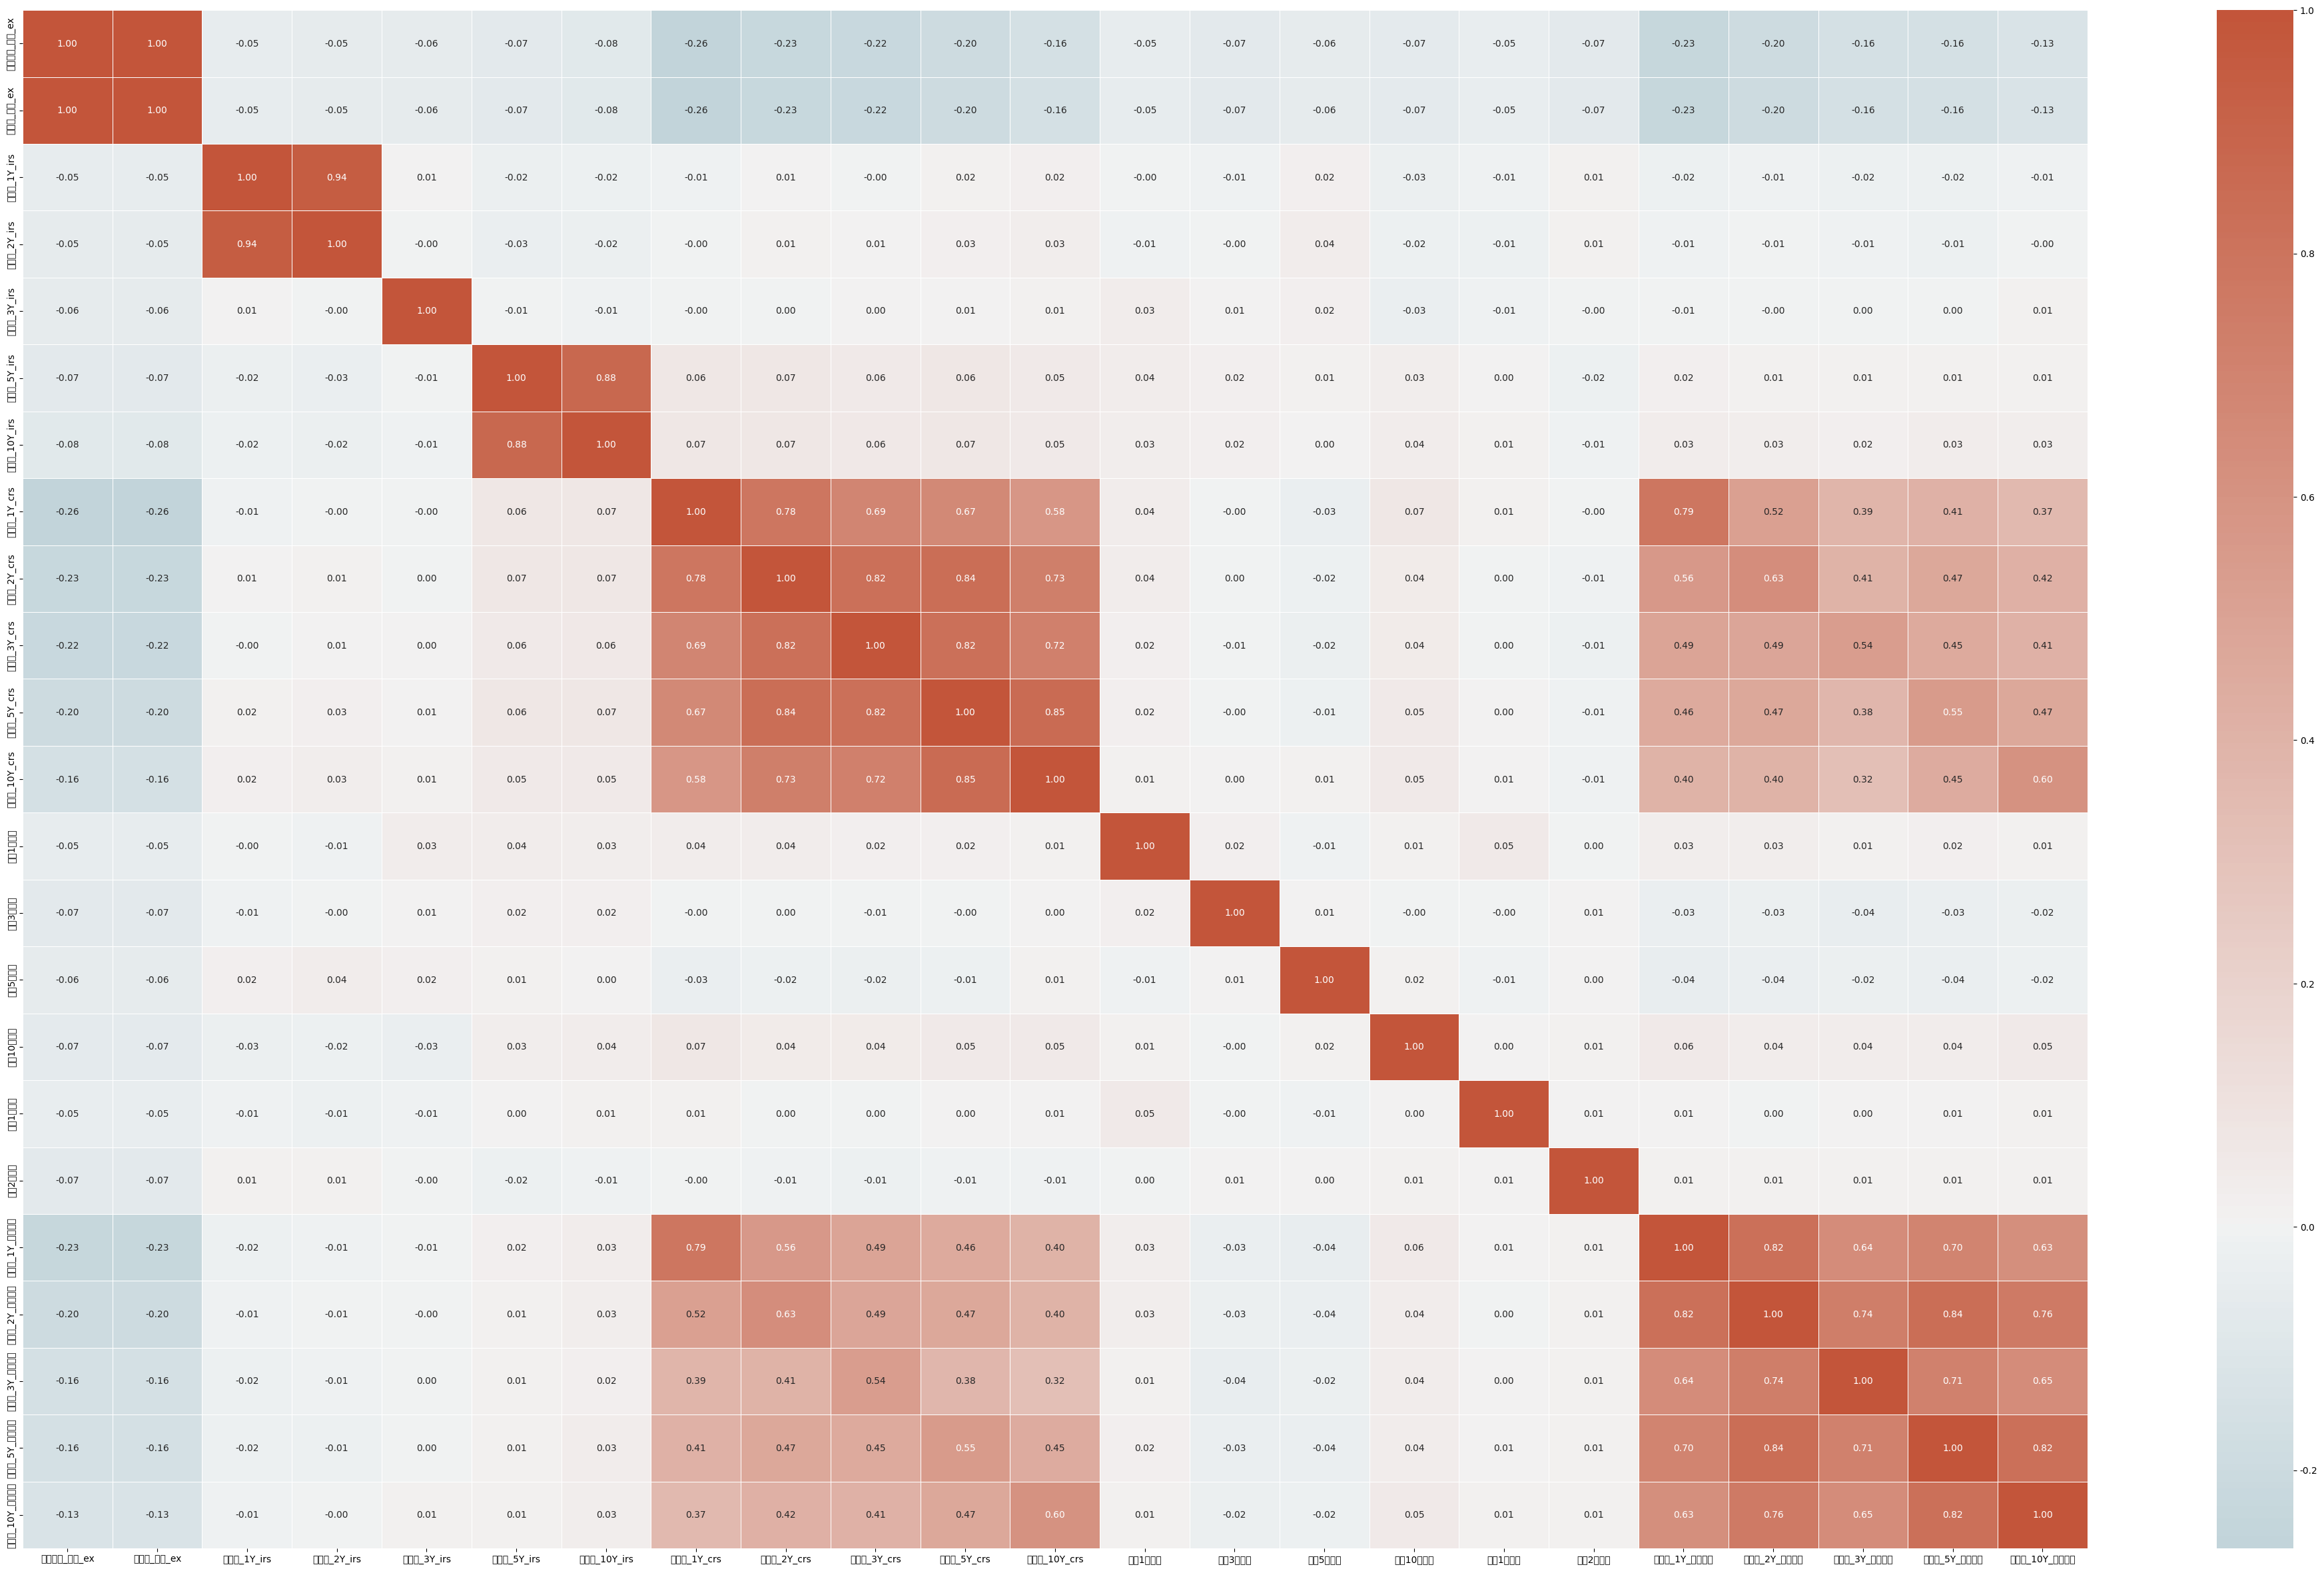

In [121]:
# 히트맵 그리기
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp 
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(50,30))

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data = df_1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [125]:
df.columns

Index(['Unnamed: 0', 'DateTime', '종가_ex', '대비_ex', '증감률_ex', '1Y_Mid_irs',
       '1Y_전일비_irs', '2Y_Mid_irs', '2Y_전일비_irs', '3Y_Mid_irs', '3Y_전일비_irs',
       '5Y_Mid_irs', '5Y_전일비_irs', '10Y_Mid_irs', '10Y_전일비_irs', '1Y_Mid_crs',
       '1Y_전일비_crs', '2Y_Mid_crs', '2Y_전일비_crs', '3Y_Mid_crs', '3Y_전일비_crs',
       '5Y_Mid_crs', '5Y_전일비_crs', '10Y_Mid_crs', '10Y_전일비_crs', '국고1년',
       '국고3년', '국고5년', '국고10년', '통안364일', '통안2년', 'Bid_ndf', 'Ask_ndf',
       'Mid_ndf', '전일비_ndf', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스',
       '10Y_베이시스', 'M1_스왑포인트', '전일대비_종가_ex', '등락률_종가_ex', '전일비_1Y_irs',
       '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs', '전일비_1Y_crs',
       '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs', '국고1년대비',
       '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비', '전일비_1Y_베이시스',
       '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스', '전일비_10Y_베이시스', '전날 종가_ex',
       '종가_NDF차이'],
      dtype='object')

In [ ]:
df['전일비_1Y_irs'] = df_irs2012_1Y["전일비_1Y_irs"]
df['전일비_2Y_irs'] = df_irs2012_2Y["전일비_2Y_irs"]
df['전일비_3Y_irs'] = df_irs2012_3Y["전일비_3Y_irs"]
df['전일비_5Y_irs'] = df_irs2012_5Y["전일비_5Y_irs"]
df['전일비_10Y_irs'] = df_irs2012_10Y["전일비_10Y_irs"]
df['국고1년대비'] = df_ktb_1Y['국고1년대비']
df['국고3년대비'] = df_ktb_3Y['국고3년대비']
df['국고5년대비'] = df_ktb_5Y['국고5년대비']
df['국고10년대비'] = df_ktb_10Y['국고10년대비']
df['통안1년대비'] = df_ktbT_1Y['통안1년대비']
df['통안2년대비'] = df_ktbT_2Y['통안2년대비']


In [130]:
df_1 = df[['전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs', 
          '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs', 
          '국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비',
           '전일비_ndf', 'M1_스왑포인트', '전날 종가_ex', '종가_ex']]

### 1.  IRS, CRS / NDF 대비

In [132]:
x = df_1[['전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs', 
          '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs', 
          '국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비',
           '전일비_ndf', 'M1_스왑포인트', '전날 종가_ex']]
y = df_1[['종가_ex']]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_18348\366235172.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,전일비_1Y_irs,전일비_2Y_irs,전일비_3Y_irs,전일비_5Y_irs,전일비_10Y_irs,전일비_1Y_crs,전일비_2Y_crs,전일비_3Y_crs,전일비_5Y_crs,전일비_10Y_crs,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안1년대비,통안2년대비,전일비_ndf,M1_스왑포인트,전날 종가_ex
0,0.604772,0.533389,-0.207732,2.080956,2.032691,-0.205655,0.707360,0.905480,0.926463,0.826282,1.898958,-0.488709,-1.584904,-5.377146,-0.325433,0.267777,0.079167,1.909409,-0.149841
1,-1.136944,-1.011189,1.210863,-0.162021,-0.159384,-0.205655,-0.364505,-0.463176,-1.872849,-3.115790,0.051587,0.004075,0.035699,-0.767092,-0.325433,0.014814,0.184972,1.818881,-0.056232
2,0.604772,0.790819,3.338756,2.080956,2.032691,-0.003373,-0.602697,-0.691285,-0.939745,-0.833538,0.051587,-0.160187,2.466603,-0.767092,-0.108742,0.267777,-0.449862,1.818881,-0.000426
3,-0.266086,-0.110185,-0.089516,1.333297,0.936654,0.401191,0.350072,-0.006957,-1.639573,-1.663448,-0.564203,-0.160187,-0.504502,-1.023207,-0.108742,-0.111668,0.020386,1.909409,-0.104837
4,1.040201,1.563108,-0.089516,-0.909679,-1.255421,0.198909,-0.007216,-0.006957,-0.473193,-0.833538,-0.564203,-0.324448,0.035699,-1.023207,-0.650470,-0.364632,0.055654,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,-0.266086,-0.238900,-0.207732,0.585638,0.388635,-1.621628,-2.150945,-1.603722,-2.572677,-2.285880,-1.179994,1.975212,-0.234402,-2.816005,0.541331,0.014814,0.154406,-0.896960,3.207485
2455,0.604772,1.048249,0.265133,-0.348935,-0.342057,0.198909,-0.721793,-0.691285,-0.473193,-0.418583,0.667378,0.825382,-1.314804,-2.047663,0.107949,-0.617595,0.050952,-0.987488,3.220086
2456,-0.266086,-0.496329,-0.207732,-0.909679,-0.890075,0.198909,-0.245409,-0.235067,-0.239917,-0.211106,0.051587,0.661120,-1.584904,0.257364,-0.108742,-0.238150,-0.026639,-0.851696,3.110275
2457,0.604772,0.790819,-0.207732,0.585638,0.571308,0.805755,0.945552,0.905480,0.693187,0.411327,1.283168,1.153905,0.035699,1.537934,-0.000397,0.014814,-0.214738,-0.942224,3.212885


In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0     8.833263   전일비_1Y_irs
1     8.843007   전일비_2Y_irs
2     1.004123   전일비_3Y_irs
3     4.341279   전일비_5Y_irs
4     4.343589  전일비_10Y_irs
5     2.619986   전일비_1Y_crs
6     5.241629   전일비_2Y_crs
7     3.822889   전일비_3Y_crs
8     6.581934   전일비_5Y_crs
9     3.701727  전일비_10Y_crs
10    1.009504       국고1년대비
11    1.002151       국고3년대비
12    1.009732       국고5년대비
13    1.009061      국고10년대비
14    1.003962       통안1년대비
15    1.001145       통안2년대비
16    1.004391      전일비_ndf
17    1.169678     M1_스왑포인트
18    1.177159     전날 종가_ex


In [136]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.362e+04
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:28:09   Log-Likelihood:                -7625.9
No. Observations:                2459   AIC:                         1.529e+04
Df Residuals:                    2439   BIC:                         1.541e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8939      0.109   1.04e+04      0.000    1134.680    1135.107
전일비_1Y_irs     -0.0278      0.324     -0.086      0.931      -0.662       0.607
전일비_2Y_irs     -0.2816      0.324     -0.870      0.385      -0.917       0.353
전일비_3Y_irs     -0.3174      0.109     -2.909      0.004      -0.531      -0.103
전일비_5Y_irs     -0.0289      0.227     -0.127      0.899      -0.474       0.416
전일비_10Y_irs    -0.3010      0.227     -1.326      0.185      -0.746       0.144
전일비_1Y_crs     -1.1648      0.176     -6.608      0.000      -1.510      -0.819
전일비_2Y_crs     -0.1629      0.249     -0.653      0.514      -0.652       0.326
전일비_3Y_crs     -0.4394      0.213     -2.064      0.039      -0.857      -0.022
전일비_5Y_crs     -0.0040      0.279     -0.014      0.989      -0.552       0.544
전일비_10Y_crs     0.2627      0.210      1.254      0.210      -0.148       0.674
국고1년대비         -0.1951      0.109     -1.784      0.075      -0.410       0.019
국고3년대비         -0.3744      0.109     -3.434      0.001      -0.588      -0.161
국고5년대비         -0.3531      0.109     -3.227      0.001      -0.568      -0.139
국고10년대비        -0.2767      0.109     -2.530      0.011      -0.491      -0.062
통안1년대비         -0.2427      0.109     -2.224      0.026      -0.457      -0.029
통안2년대비         -0.3916      0.109     -3.594      0.000      -0.605      -0.178
전일비_ndf         0.5408      0.109      4.955      0.000       0.327       0.755
M1_스왑포인트       -0.1369      0.118     -1.162      0.245      -0.368       0.094
전날 종가_ex       55.4311      0.118    469.172      0.000      55.199      55.663
==============================================================================
Omnibus:                       47.425   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.770
Skew:                          -0.023   Prob(JB):                     9.70e-22
Kurtosis:                       3.971   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
x_scaled.drop(['전일비_1Y_irs', '전일비_2Y_irs', '전일비_5Y_irs', '전일비_2Y_crs', '전일비_5Y_crs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0     1.003771   전일비_3Y_irs
1     1.007811  전일비_10Y_irs
2     1.988367   전일비_1Y_crs
3     2.713748   전일비_3Y_crs
4     2.131123  전일비_10Y_crs
5     1.008148       국고1년대비
6     1.001642       국고3년대비
7     1.006794       국고5년대비
8     1.007906      국고10년대비
9     1.003540       통안1년대비
10    1.000686       통안2년대비
11    1.003005      전일비_ndf
12    1.169048     M1_스왑포인트
13    1.176422     전날 종가_ex


In [138]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.845e+04
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:34:29   Log-Likelihood:                -7630.2
No. Observations:                2459   AIC:                         1.529e+04
Df Residuals:                    2444   BIC:                         1.538e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8939      0.109   1.04e+04      0.000    1134.680    1135.108
전일비_3Y_irs     -0.3164      0.109     -2.898      0.004      -0.530      -0.102
전일비_10Y_irs    -0.3203      0.109     -2.928      0.003      -0.535      -0.106
전일비_1Y_crs     -1.2190      0.154     -7.933      0.000      -1.520      -0.918
전일비_3Y_crs     -0.5018      0.180     -2.795      0.005      -0.854      -0.150
전일비_10Y_crs     0.2082      0.159      1.309      0.191      -0.104       0.520
국고1년대비         -0.1956      0.109     -1.787      0.074      -0.410       0.019
국고3년대비         -0.3742      0.109     -3.431      0.001      -0.588      -0.160
국고5년대비         -0.3633      0.109     -3.322      0.001      -0.578      -0.149
국고10년대비        -0.2688      0.109     -2.457      0.014      -0.483      -0.054
통안1년대비         -0.2375      0.109     -2.175      0.030      -0.452      -0.023
통안2년대비         -0.3942      0.109     -3.616      0.000      -0.608      -0.180
전일비_ndf         0.5481      0.109      5.022      0.000       0.334       0.762
M1_스왑포인트       -0.1356      0.118     -1.151      0.250      -0.367       0.095
전날 종가_ex       55.4279      0.118    468.954      0.000      55.196      55.660
==============================================================================
Omnibus:                       48.291   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.574
Skew:                          -0.015   Prob(JB):                     2.39e-22
Kurtosis:                       3.985   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.345e+04
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:51:04   Log-Likelihood:                -7633.3
No. Observations:                2459   AIC:                         1.529e+04
Df Residuals:                    2447   BIC:                         1.536e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1134.8939      0.109   1.04e+04      0.000    1134.680    1135.108
전일비_3Y_irs     -0.3229      0.109     -2.958      0.003      -0.537      -0.109
전일비_10Y_irs    -0.3243      0.109     -2.964      0.003      -0.539      -0.110
전일비_1Y_crs     -1.1930      0.152     -7.868      0.000      -1.490      -0.896
전일비_3Y_crs     -0.3739      0.151     -2.473      0.013      -0.670      -0.077
국고3년대비         -0.3769      0.109     -3.455      0.001      -0.591      -0.163
국고5년대비         -0.3540      0.109     -3.239      0.001      -0.568      -0.140
국고10년대비        -0.2685      0.109     -2.453      0.014      -0.483      -0.054
통안1년대비         -0.2467      0.109     -2.261      0.024      -0.461      -0.033
통안2년대비         -0.3933      0.109     -3.606      0.000      -0.607      -0.179
전일비_ndf         0.5512      0.109      5.048      0.000       0.337       0.765
전날 종가_ex       55.4699      0.109    506.915      0.000      55.255      55.684
==============================================================================
Omnibus:                       49.848   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.289
Skew:                          -0.014   Prob(JB):                     2.26e-23
Kurtosis:                       4.009   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 27.69790221887577, RMSE :  5.263, MAE: 5.263
Variance score :  0.991


In [147]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(8.091304403212801,
 array([ 4.04675174,  6.65487279,  5.65037136, 18.90270757,  5.20181856]),
 array([ -16.37619965,  -44.28733188,  -31.92669645, -357.31235331,
         -27.05891636]))